In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("../raw_data/all_expanded_ML.csv")

In [3]:
df.head()

Ano  Código_IBGE Localização  Aprovação  Reprovação  Abandono  Matrículas  \
0  2012      1100023       Rural       92.6         4.0       3.4         498   
1  2012      1100023      Urbana       69.9        16.6      13.5        3453   
2  2012      1100031       Rural       92.1         2.6       5.3          38   
3  2012      1100031      Urbana       91.3         5.2       3.5         230   
4  2012      1100064       Rural       90.6         9.2       0.2         415   

   Docentes  Estabelecimentos  Turmas  ...  Poverty_%  Unemployed_%  \
0        42                 1      15  ...      31.61          6.35   
1       172                 6     136  ...      31.61          6.35   
2         6                 1       3  ...      31.61          6.35   
3        22                 1      11  ...      31.61          6.35   
4        42                 1      15  ...      31.61          6.35   

   Código_UF    Estado  UF          Município Região Acesso_a_internet_%  \
0         11  Rondônia  RO          Ariquemes  Norte                  21   
1         11  Rondônia  RO          Ariquemes  Norte                  21   
2         11  Rondônia  RO             Cabixi  Norte                  21   
3         11  Rondônia  RO             Cabixi  Norte                  21   
4         11  Rondônia  RO  Colorado do Oeste  Norte                  21   

  Adjusted_population  Adjusted_funding  
0            13912.05      5.327668e+06  
1            78834.95      3.019012e+07  
2              919.80      2.282065e+05  
3             5212.20      1.293170e+06  
4             2713.95      4.222213e+05  

[5 rows x 22 columns]

##  Ranking Top 10 Municípos com mais Funding de cada Região por ano 

In [9]:
from tabulate import tabulate

# 1. Agrupe por 'Ano', 'Região', 'Município' e some as matrículas para cada cidade dentro de cada ano e região.
ranking_municipios_ano_regiao = df.groupby(['Ano', 'Região', 'Município'])['Adjusted_funding'].sum().reset_index()

# 2. Para cada ano e região, calcule o ranking dos 10 municípios com mais matrículas.
anos_regioes_unicos = ranking_municipios_ano_regiao[['Ano', 'Região']].drop_duplicates()

for _, row in anos_regioes_unicos.iterrows():
    ano, regiao = row['Ano'], row['Região']
    print(f"ANO   : {ano}")
    print(f"Região: {regiao}")
    
    ranking_ano_regiao = ranking_municipios_ano_regiao[(ranking_municipios_ano_regiao['Ano'] == ano) & (ranking_municipios_ano_regiao['Região'] == regiao)]
    
    # Agrupe por 'Município' e some as matrículas para cada cidade dentro da região e ano.
    ranking_municipio_regiao_ano = ranking_ano_regiao.groupby(['Município'])['Adjusted_funding'].sum().reset_index()
    
    # Calcule o ranking dos 10 municípios com mais matrículas naquela região e ano.
    ranking_municipio_regiao_ano = ranking_municipio_regiao_ano.sort_values(by='Adjusted_funding', ascending=False).head(10)
    
    # Crie uma tabela formatada com tabulate e exiba.
    table = tabulate(ranking_municipio_regiao_ano, headers=['Município', 'Funding'], tablefmt='pretty', showindex=False)
    print(table)
    print()

ANO   : 2012
Região: Centro Oeste
+-----------------------+-------------------+
|       Município       |      Funding      |
+-----------------------+-------------------+
|        Goiânia        |    234432939.2    |
|        Cuiabá         |    95293837.38    |
|       Anápolis        |    84273394.17    |
| Aparecida de Goiânia  |    75044401.86    |
|       Dourados        | 67529344.82000001 |
|       Luziânia        |   56892272.518    |
| Águas Lindas de Goiás |    48607784.38    |
|       Rio Verde       |    48298243.33    |
|  Valparaíso de Goiás  |    46270396.75    |
|      Planaltina       |   43794801.636    |
+-----------------------+-------------------+

ANO   : 2012
Região: Nordeste
+-------------+--------------------+
|  Município  |      Funding       |
+-------------+--------------------+
|  Fortaleza  |    365030436.2     |
|  Salvador   |    287328920.5     |
|  São Luís   |    241003242.24    |
|  Teresina   |    195620473.17    |
|   Recife    |    175836679.9  

##  Ranking Top 10 Municípos com mais matrículas de cada Região por ano 

In [37]:
# incluir um Display com Filtro por Ano e Região para  popular as tabelas abaixo ?

In [5]:
from tabulate import tabulate

# 1. Agrupe por 'Ano', 'Região', 'Município' e some as matrículas para cada cidade dentro de cada ano e região.
ranking_municipios_ano_regiao = df.groupby(['Ano', 'Região', 'Município'])['Matrículas'].sum().reset_index()

# 2. Para cada ano e região, calcule o ranking dos 10 municípios com mais matrículas.
anos_regioes_unicos = ranking_municipios_ano_regiao[['Ano', 'Região']].drop_duplicates()

for _, row in anos_regioes_unicos.iterrows():
    ano, regiao = row['Ano'], row['Região']
    print(f"ANO   : {ano}")
    print(f"Região: {regiao}")
    
    ranking_ano_regiao = ranking_municipios_ano_regiao[(ranking_municipios_ano_regiao['Ano'] == ano) & (ranking_municipios_ano_regiao['Região'] == regiao)]
    
    # Agrupe por 'Município' e some as matrículas para cada cidade dentro da região e ano.
    ranking_municipio_regiao_ano = ranking_ano_regiao.groupby(['Município'])['Matrículas'].sum().reset_index()
    
    # Calcule o ranking dos 10 municípios com mais matrículas naquela região e ano.
    ranking_municipio_regiao_ano = ranking_municipio_regiao_ano.sort_values(by='Matrículas', ascending=False).head(10)
    
    # Crie uma tabela formatada com tabulate e exiba.
    table = tabulate(ranking_municipio_regiao_ano, headers=['Município', 'Matrículas'], tablefmt='pretty', showindex=False)
    print(table)
    print()


ANO   : 2012
Região: Centro Oeste
+-----------------------+------------+
|       Município       | Matrículas |
+-----------------------+------------+
|        Goiânia        |   44053    |
|        Cuiabá         |   21993    |
| Aparecida de Goiânia  |   18205    |
|       Anápolis        |   12480    |
|     Rondonópolis      |    9516    |
|       Luziânia        |    8168    |
|       Dourados        |    6376    |
|       Rio Verde       |    6083    |
| Águas Lindas de Goiás |    5760    |
|         Sinop         |    5748    |
+-----------------------+------------+

ANO   : 2012
Região: Nordeste
+-------------------------+------------+
|        Município        | Matrículas |
+-------------------------+------------+
|        Salvador         |   87762    |
|        Fortaleza        |   79422    |
|         Recife          |   54413    |
|        São Luís         |   46645    |
|        Teresina         |   40283    |
|          Natal          |   28194    |
|         Maceió    

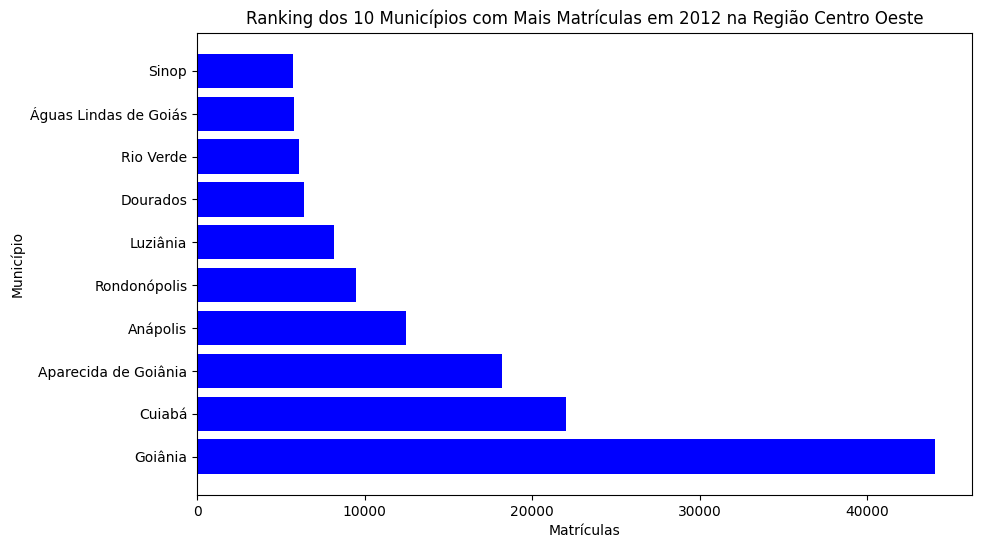

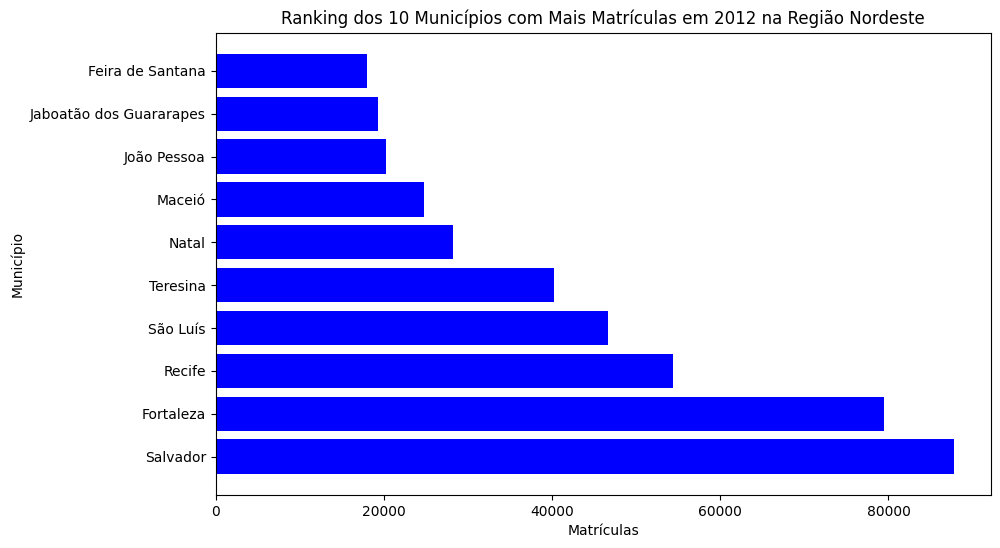

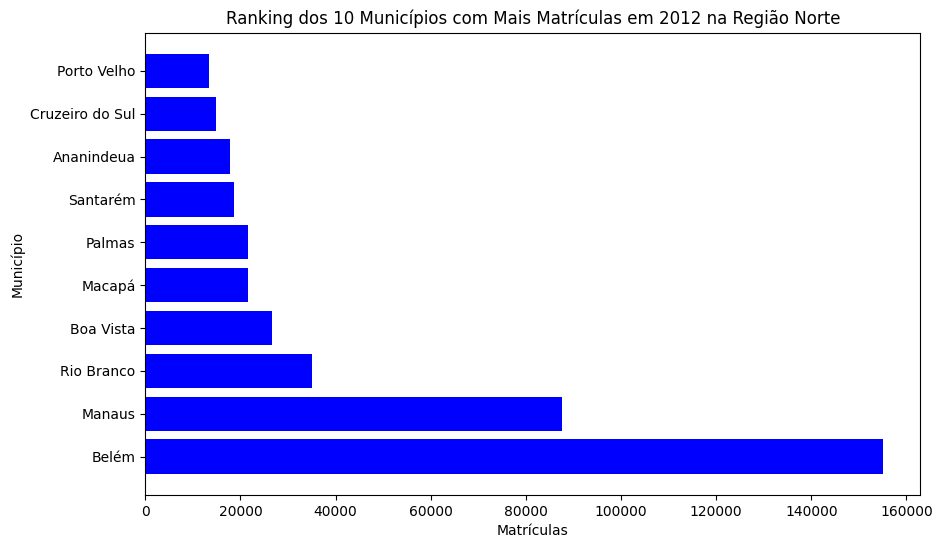

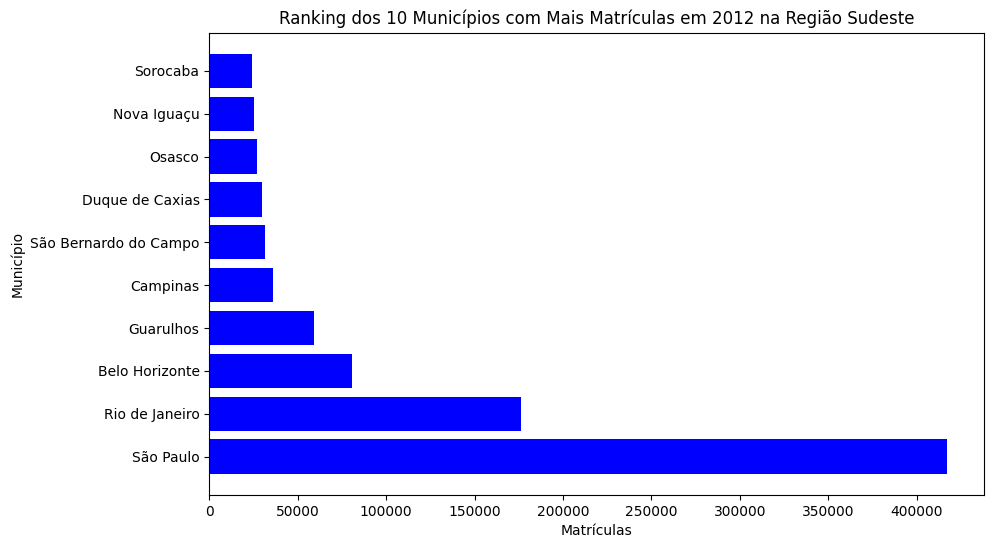

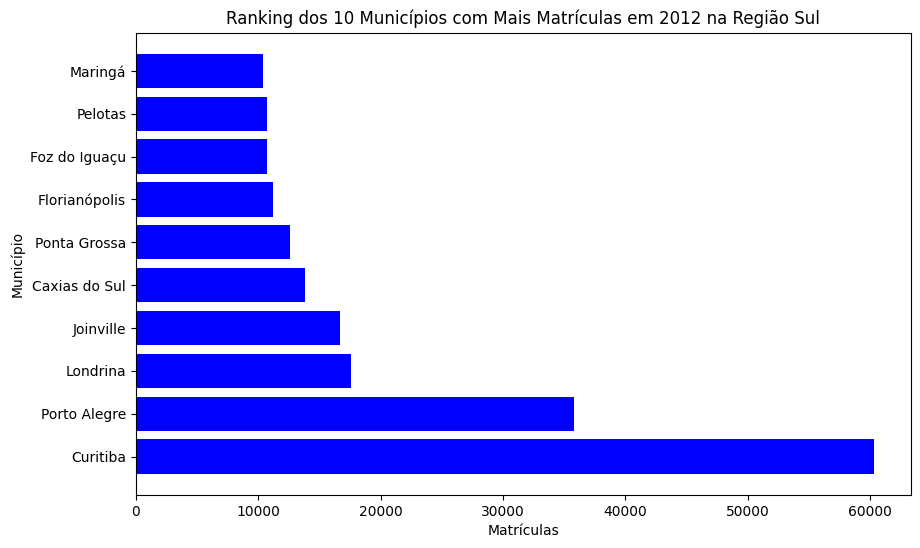

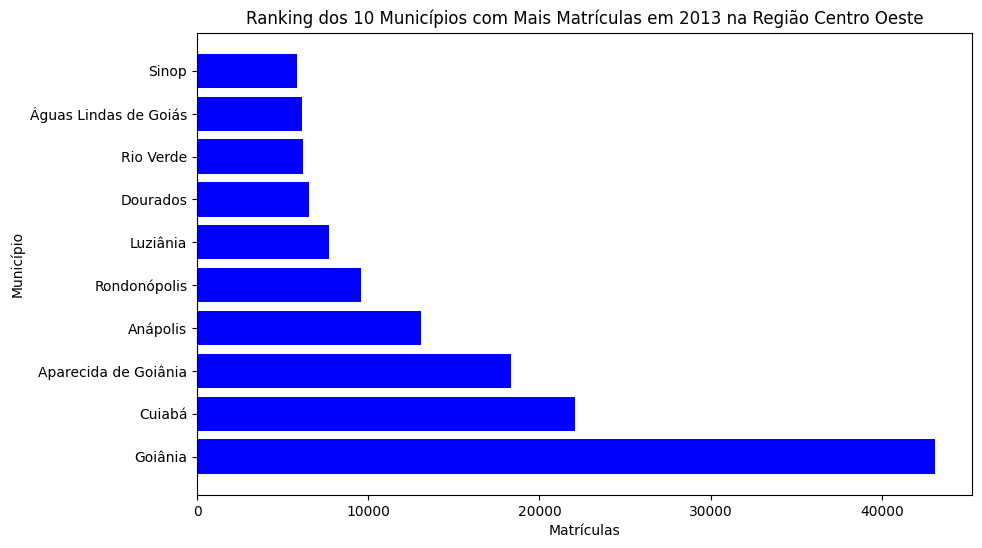

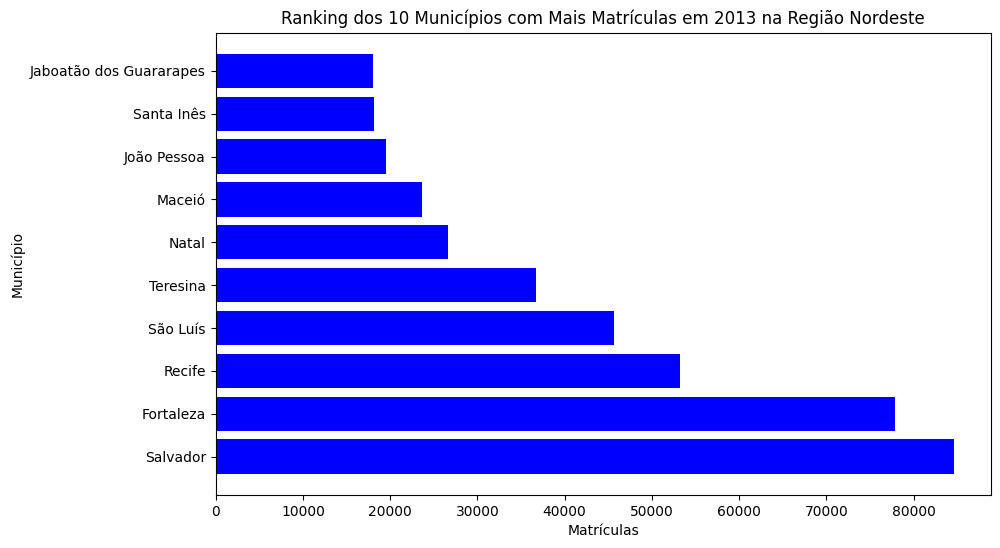

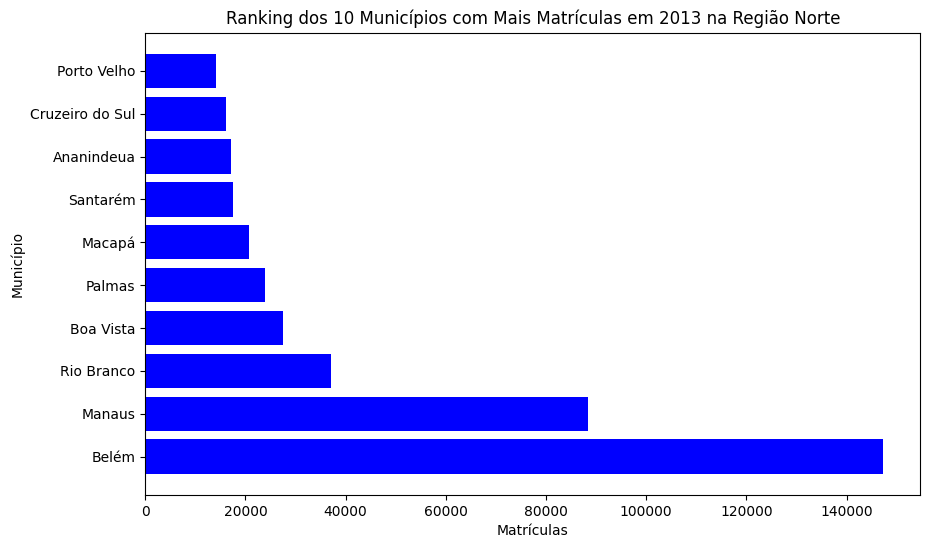

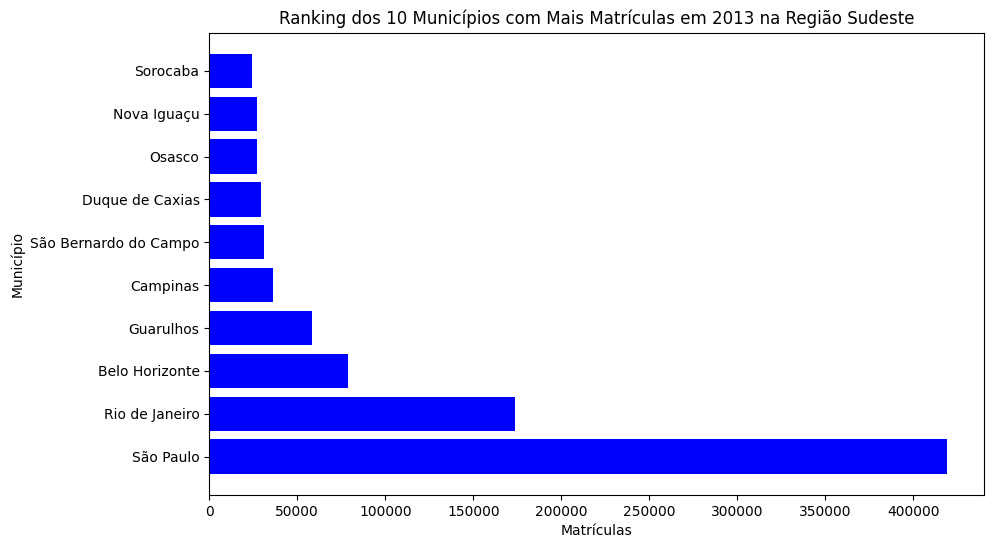

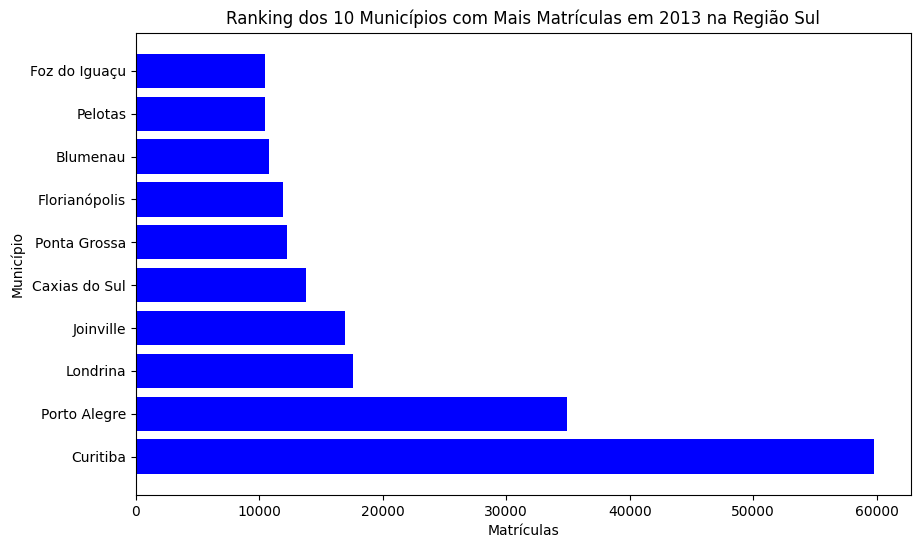

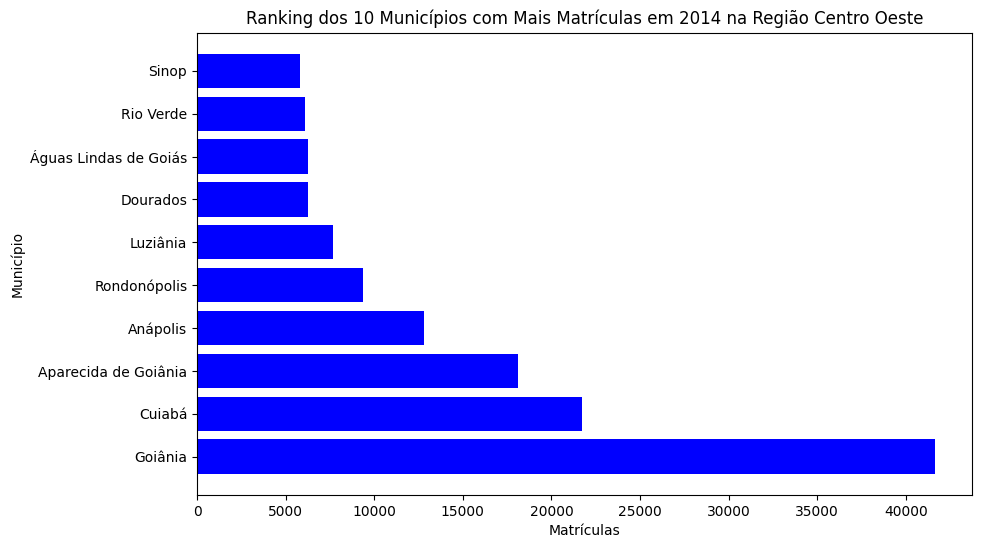

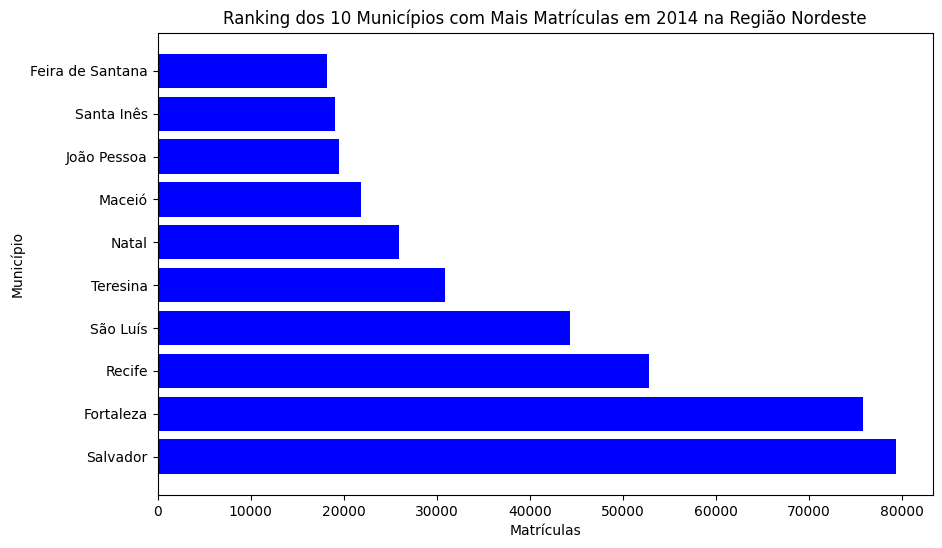

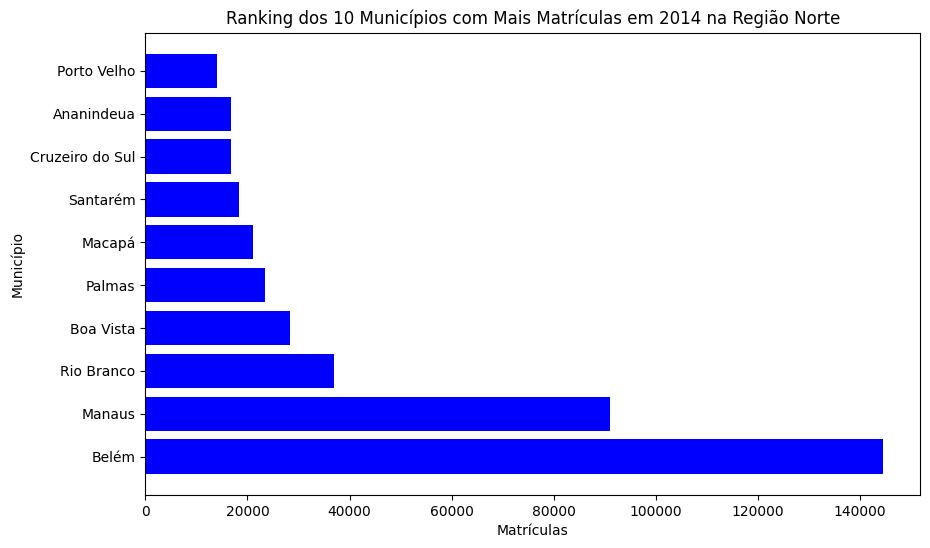

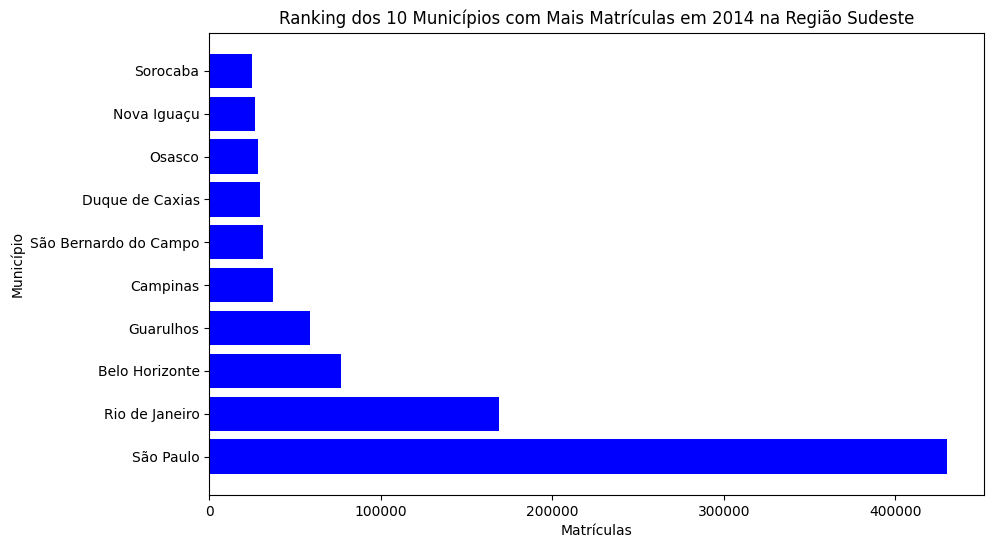

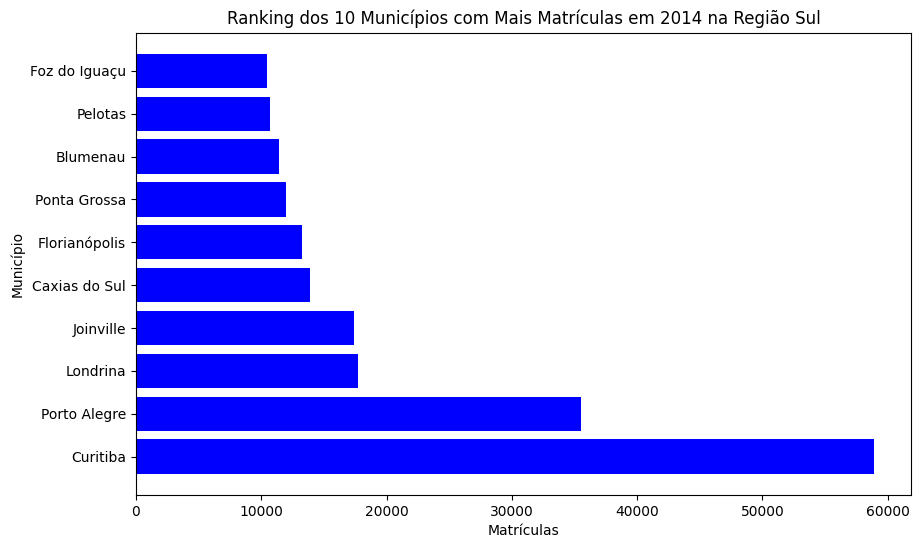

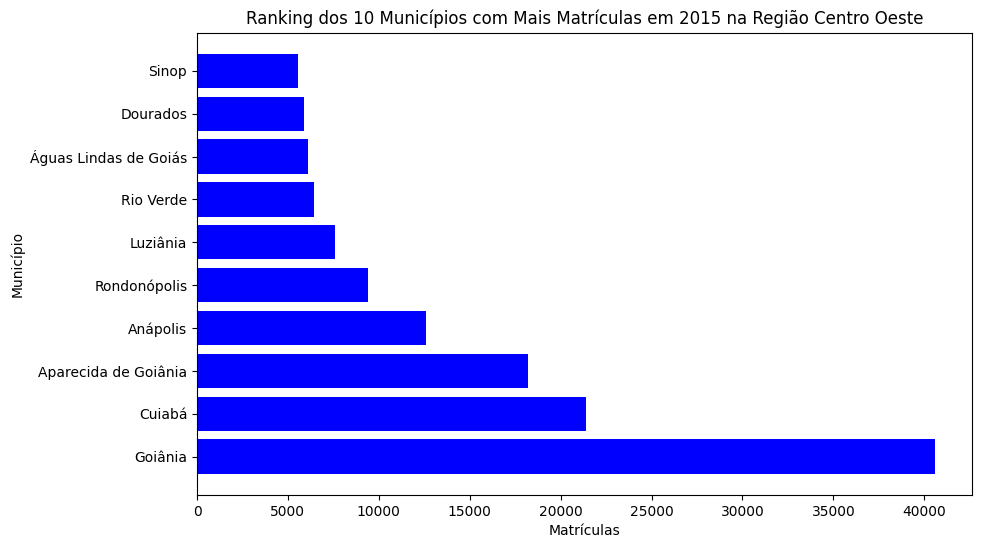

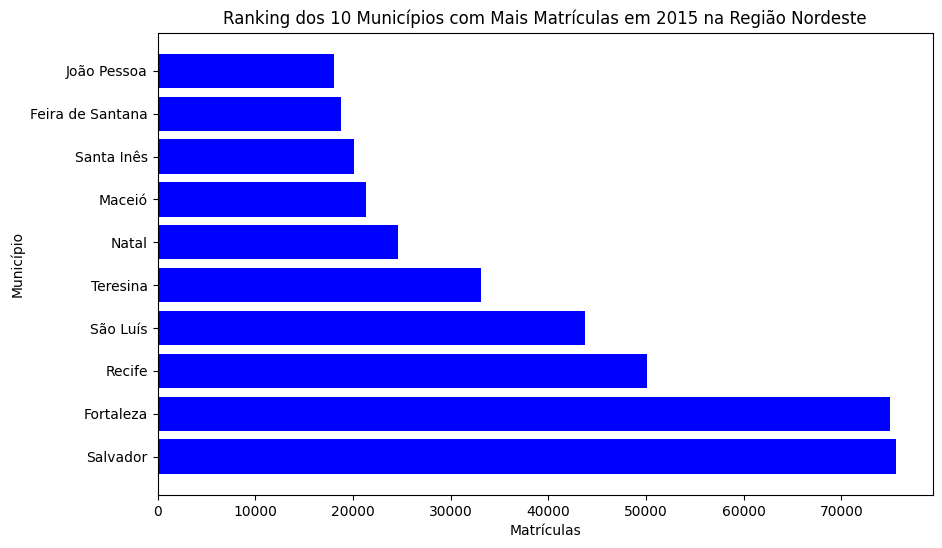

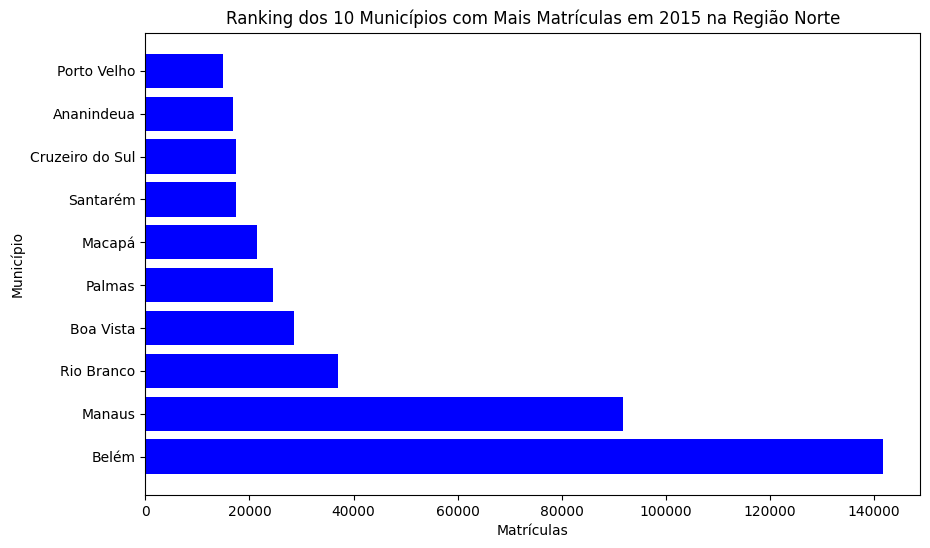

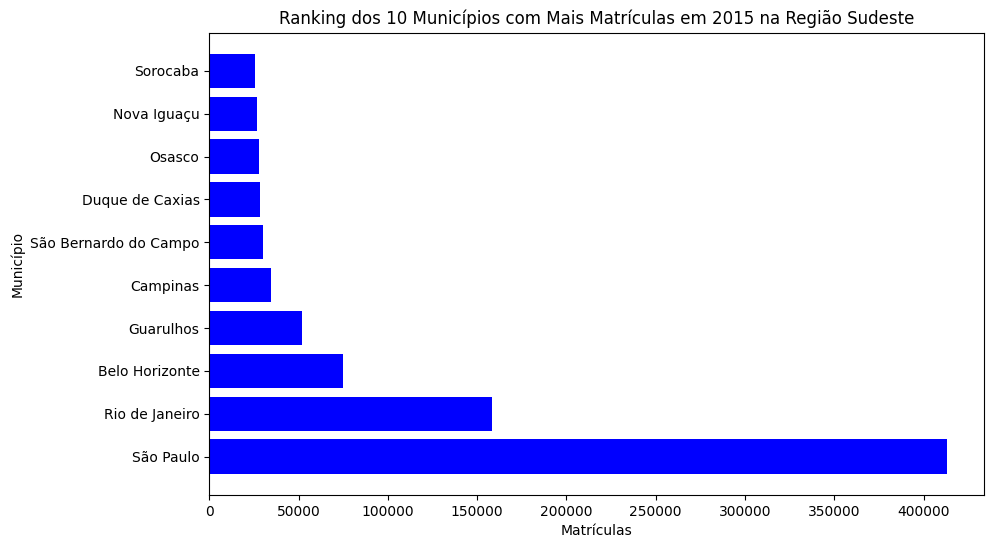

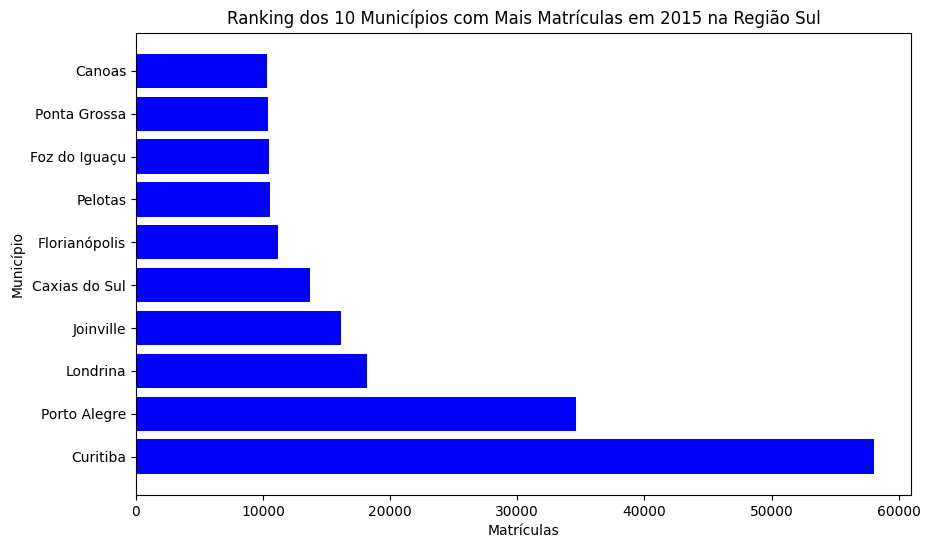

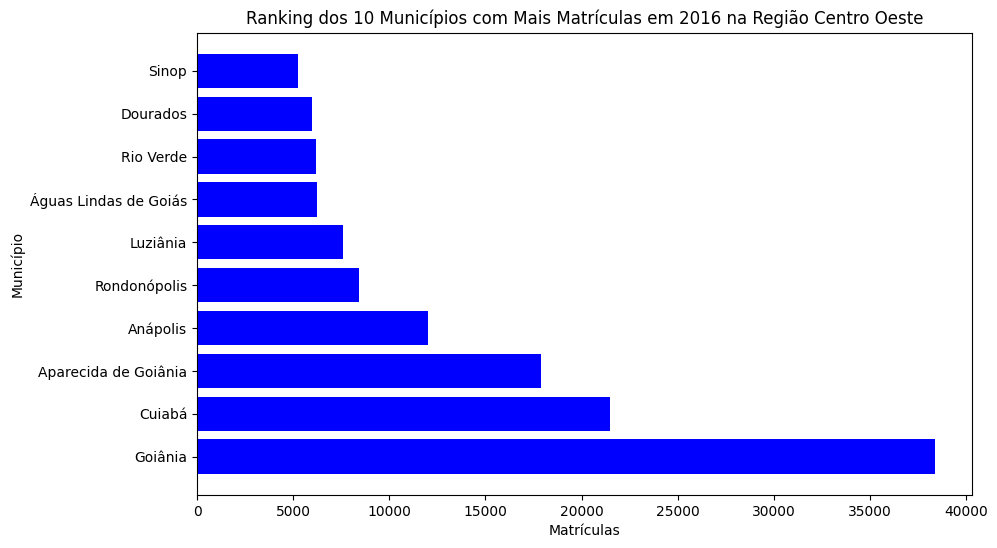

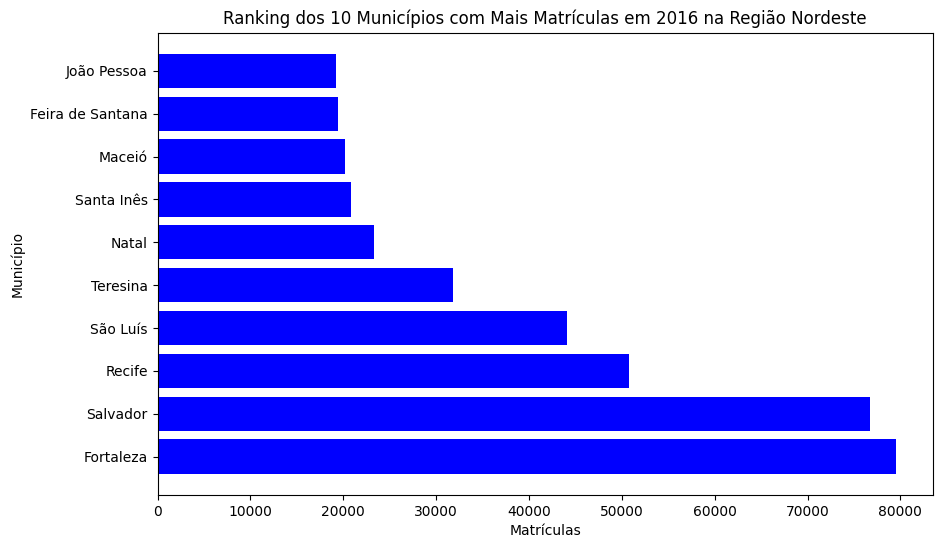

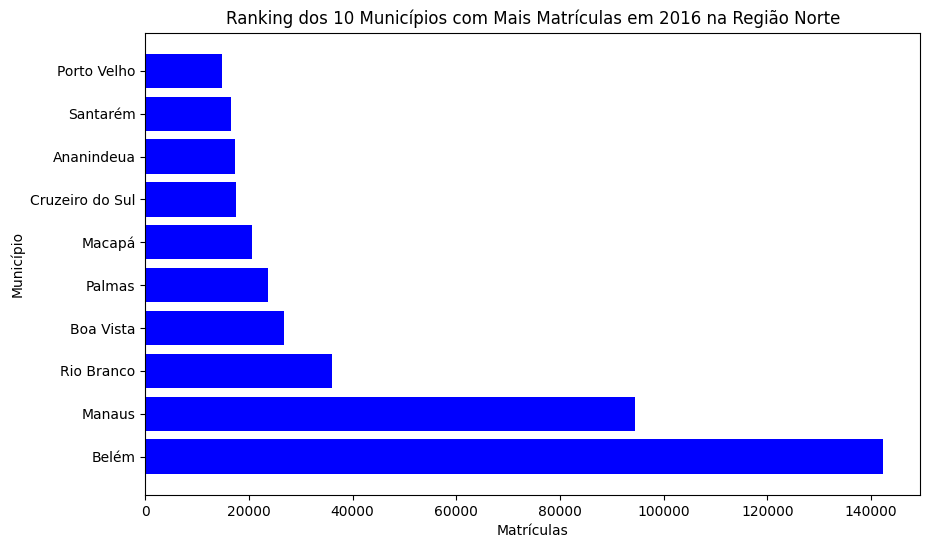

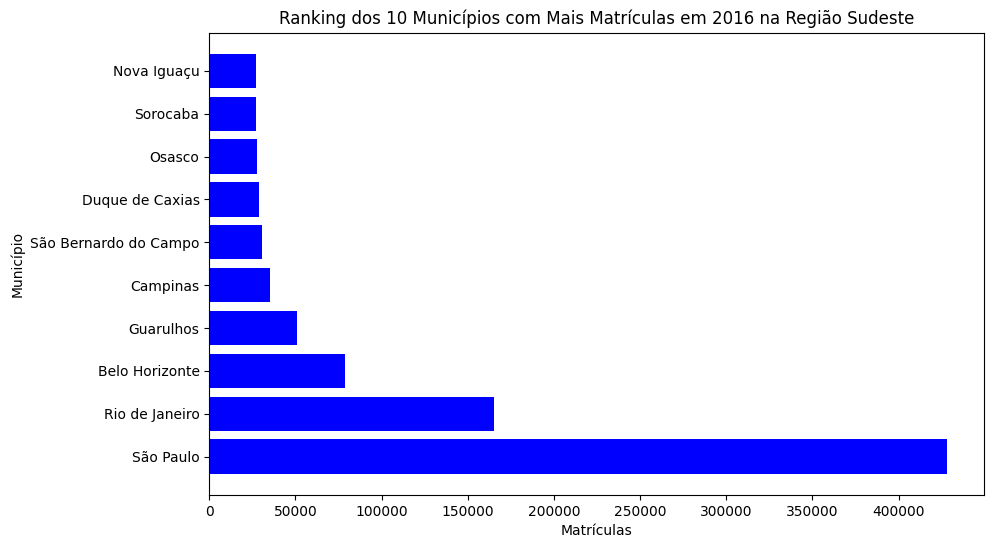

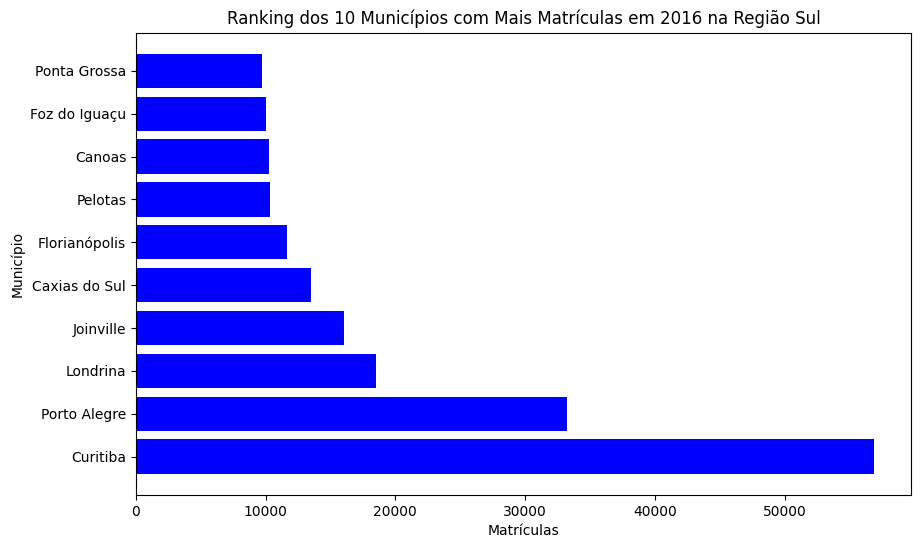

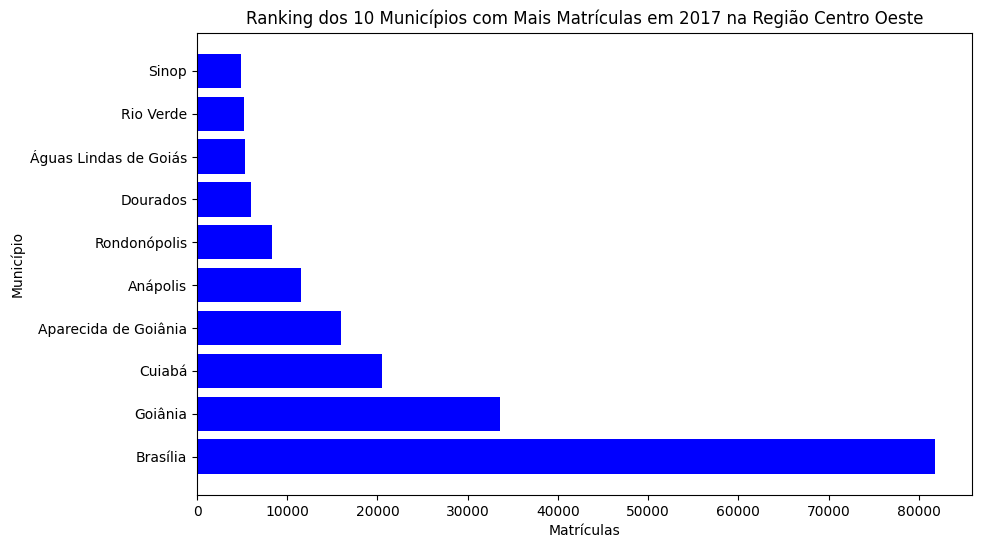

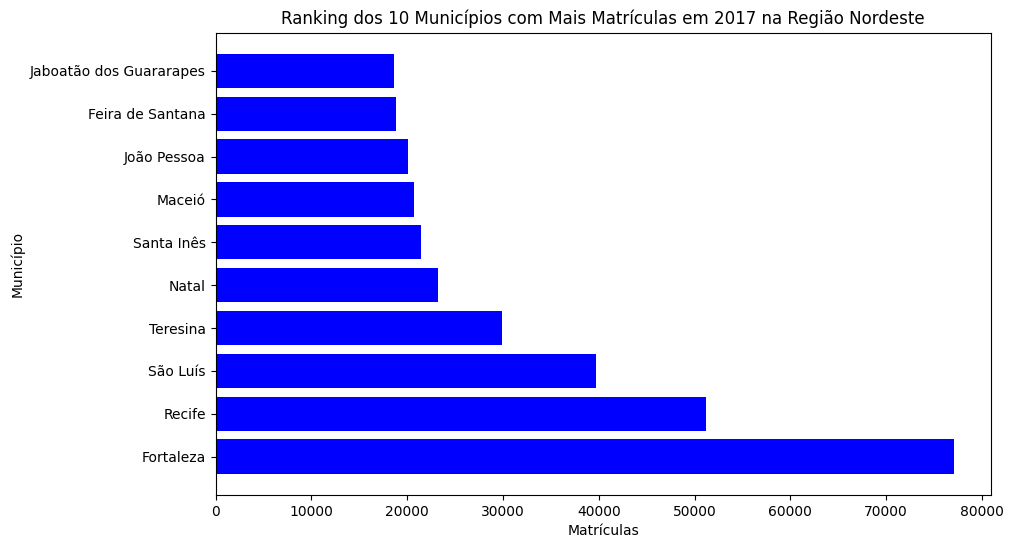

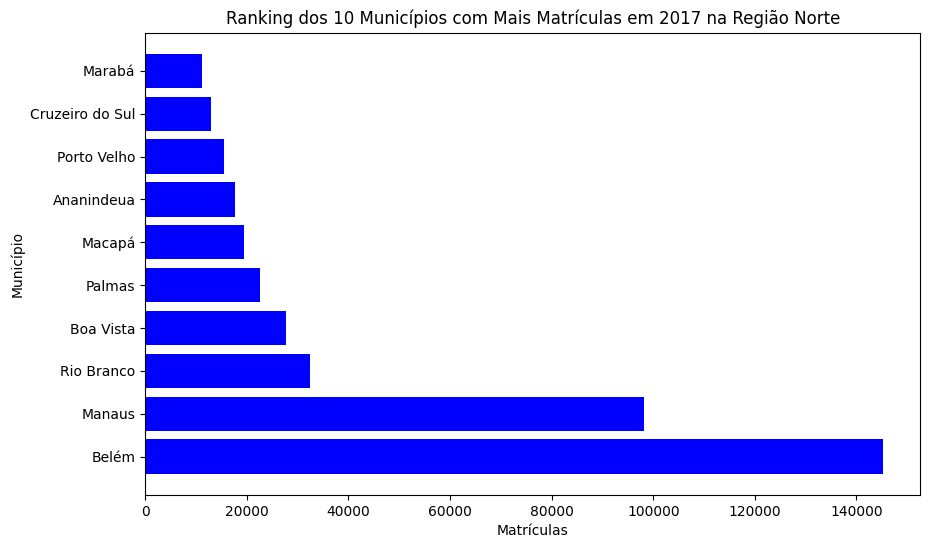

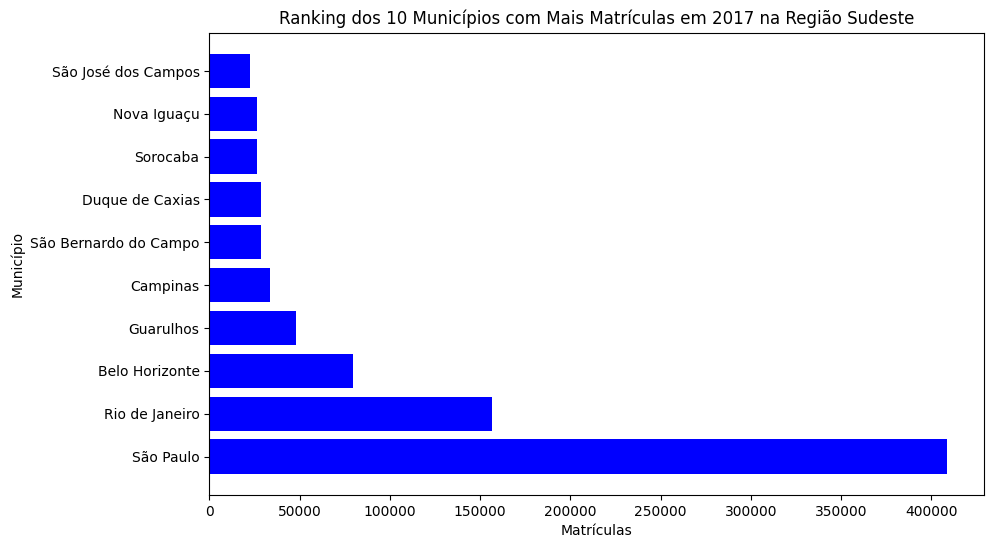

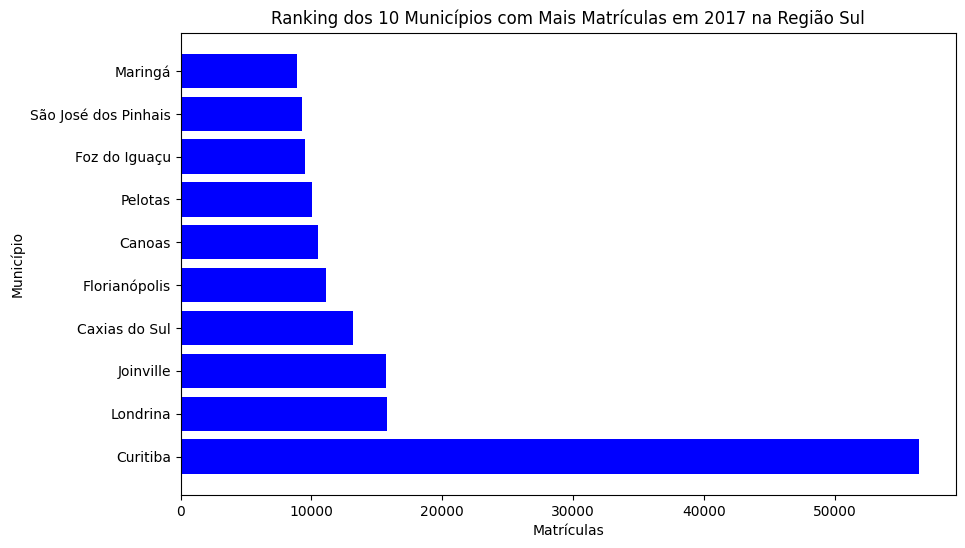

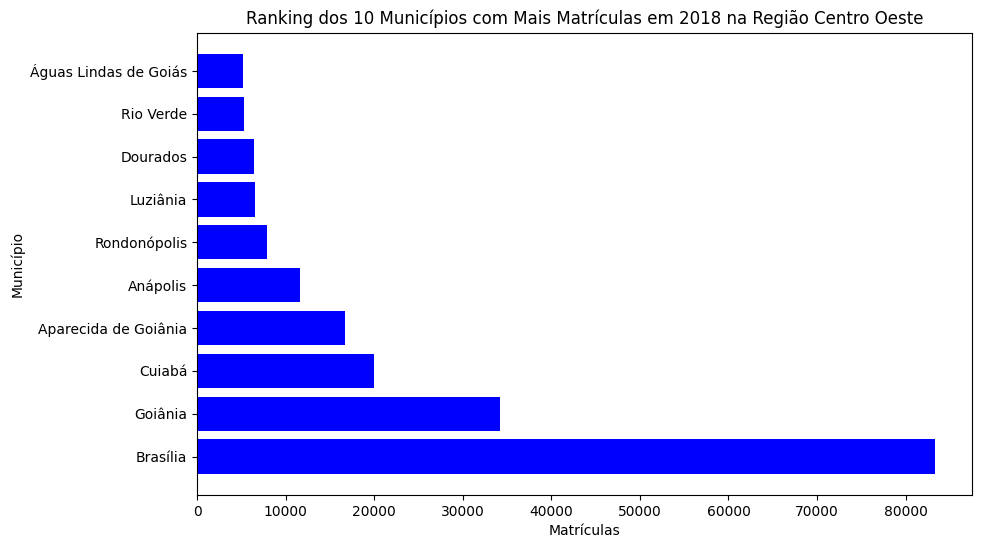

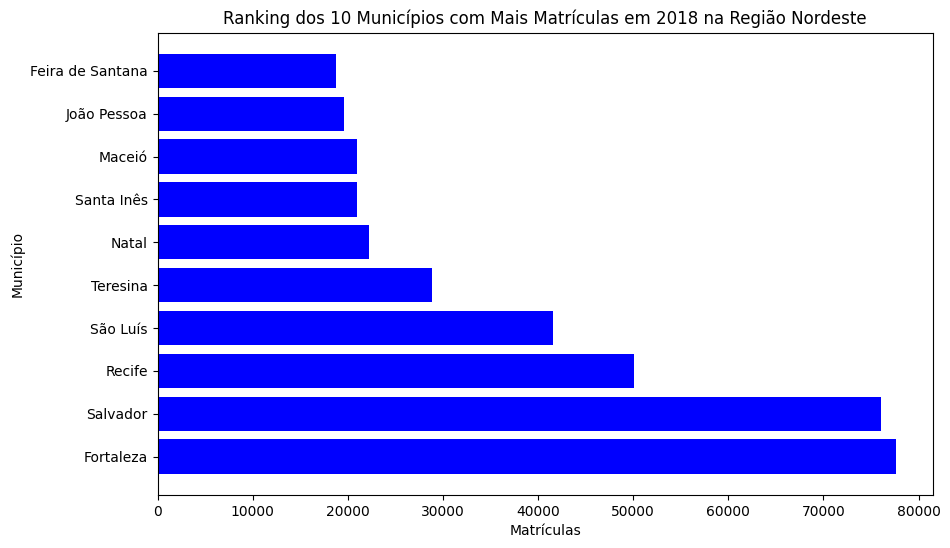

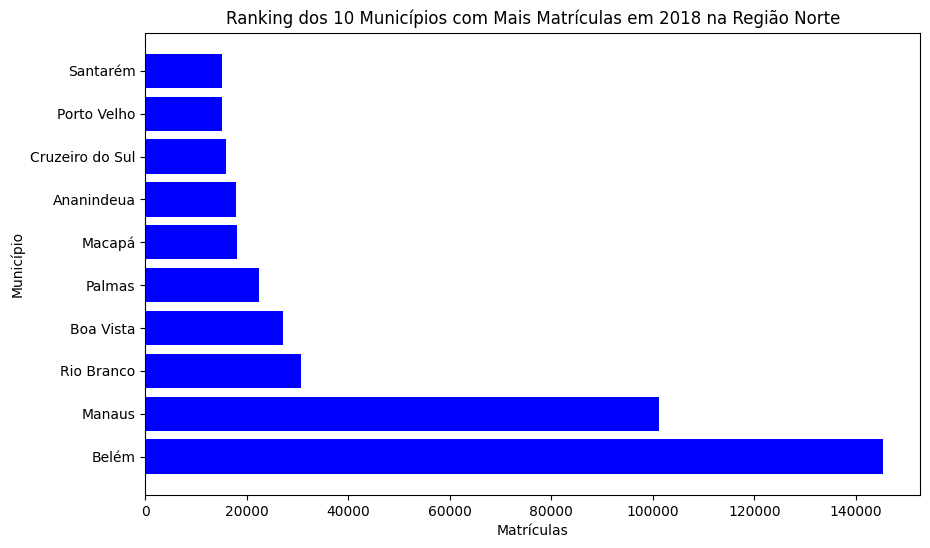

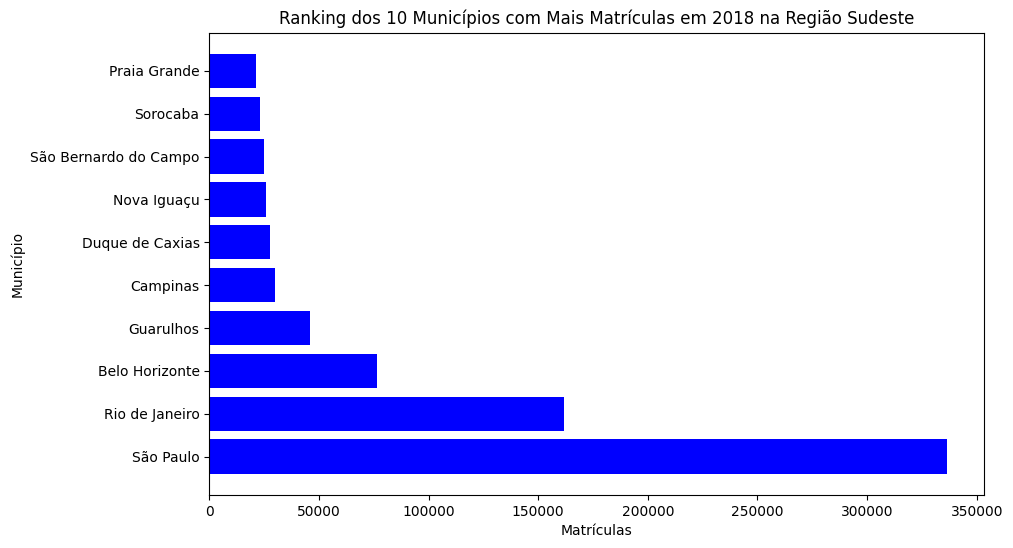

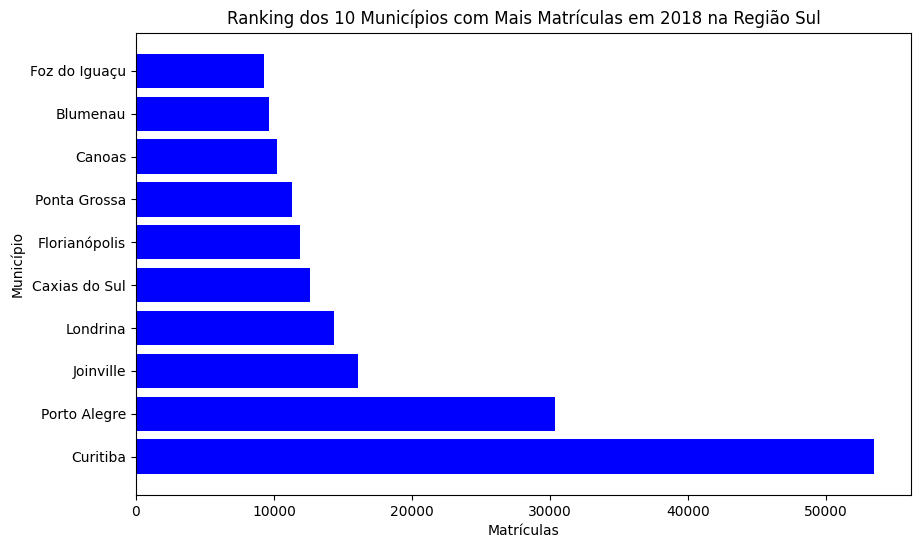

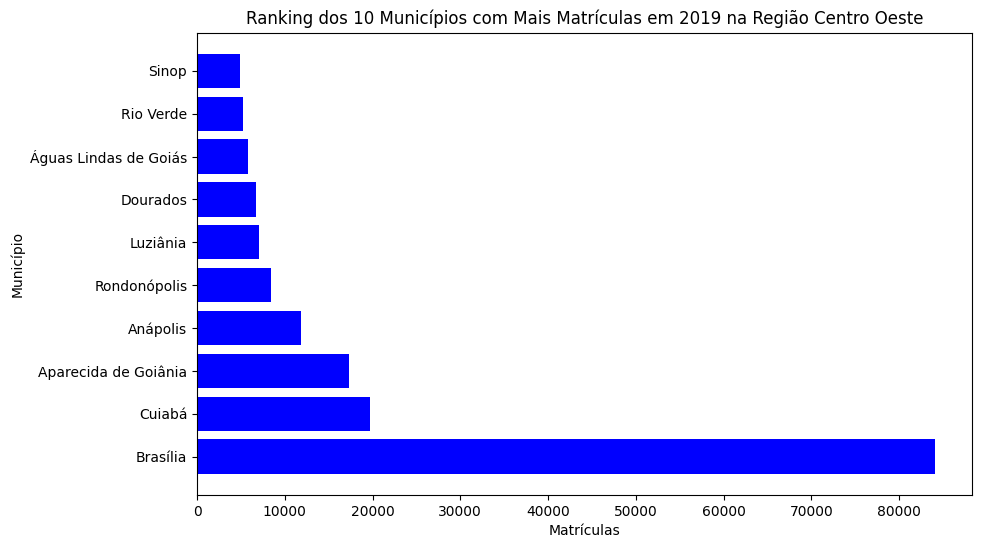

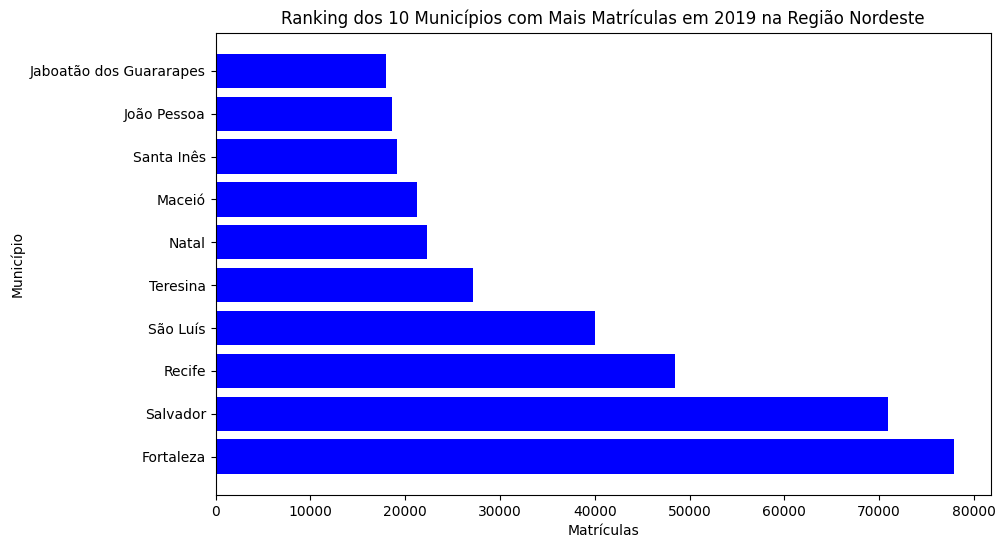

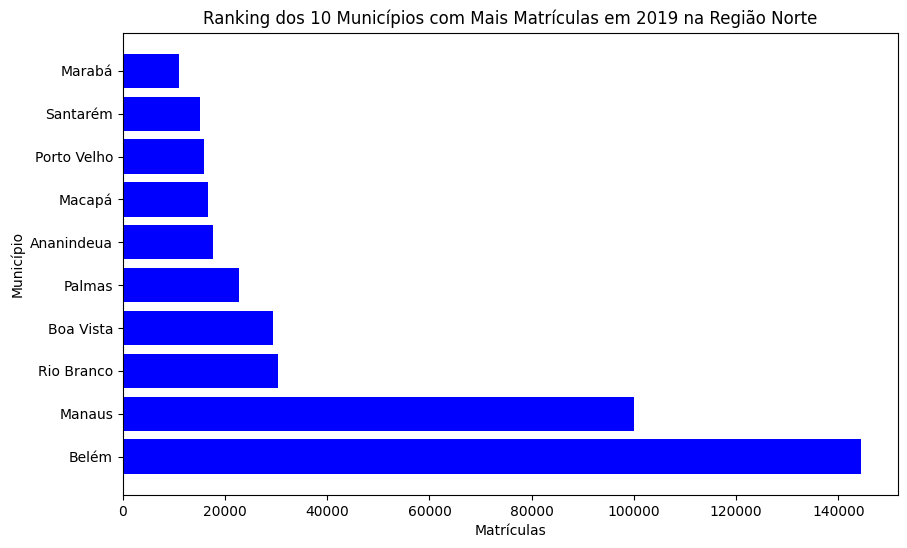

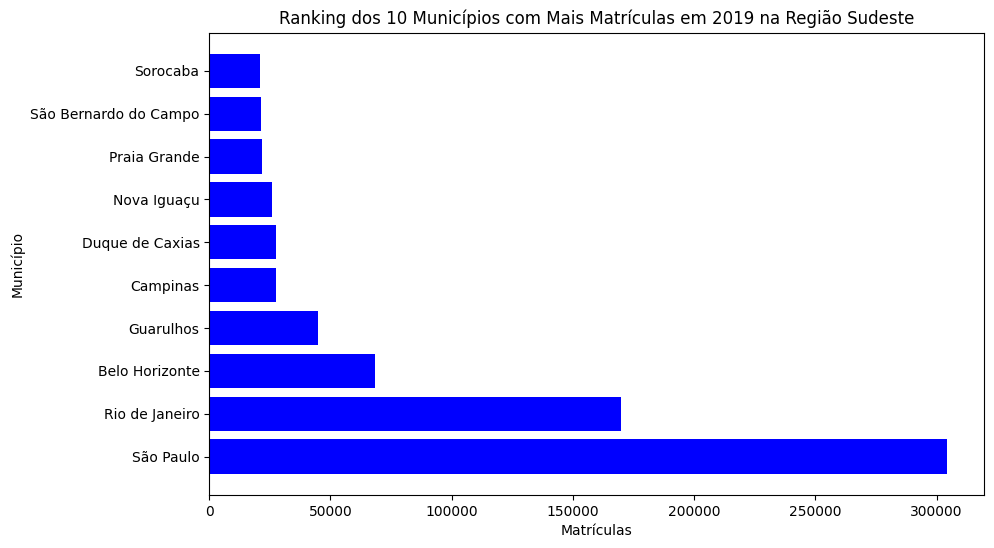

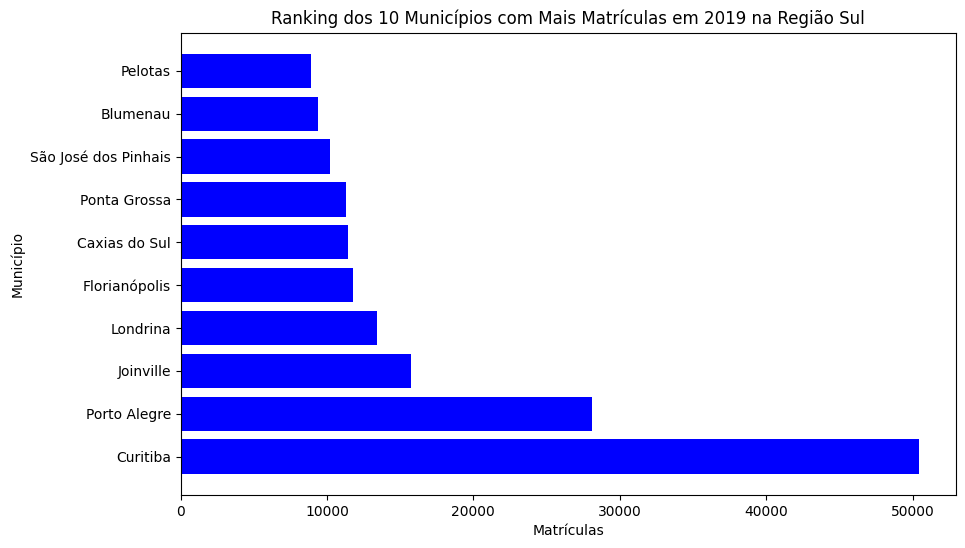

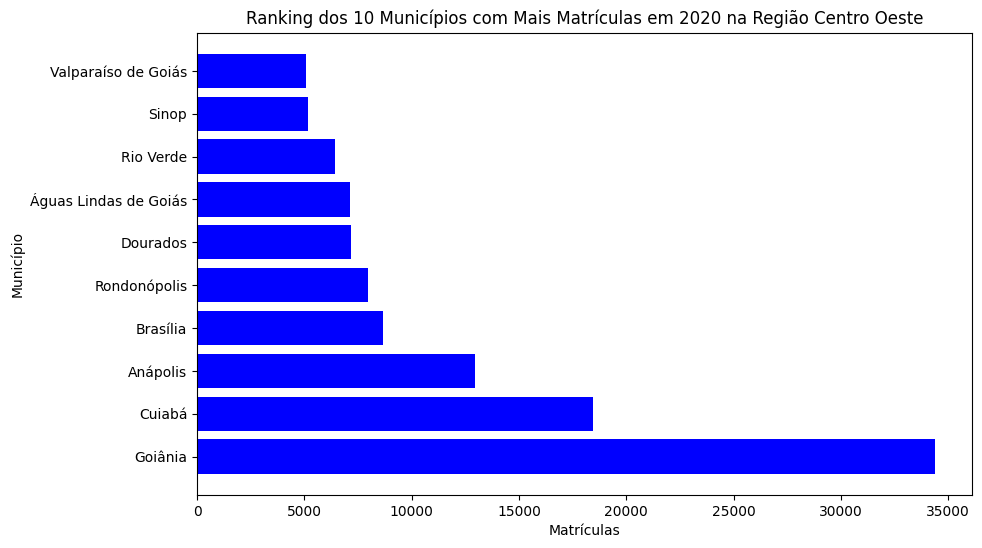

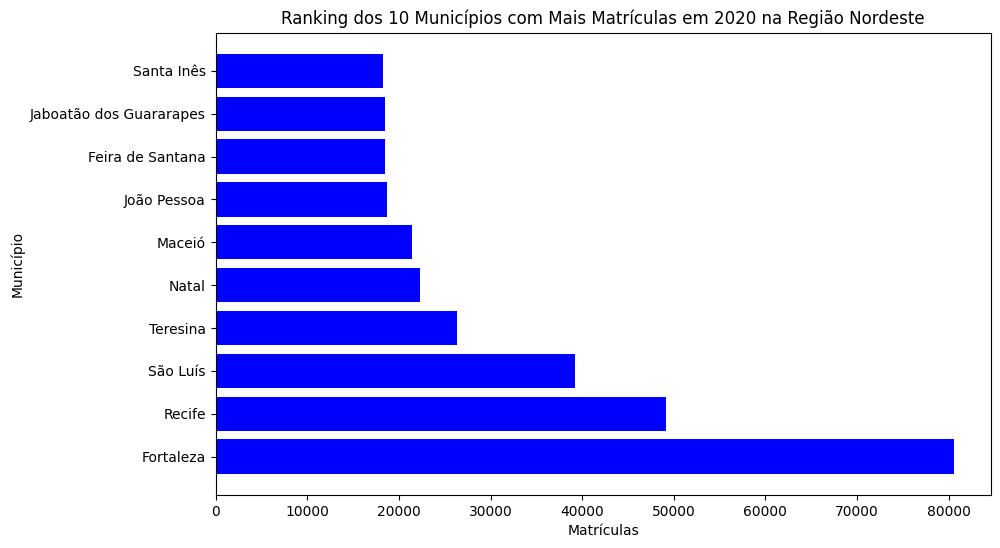

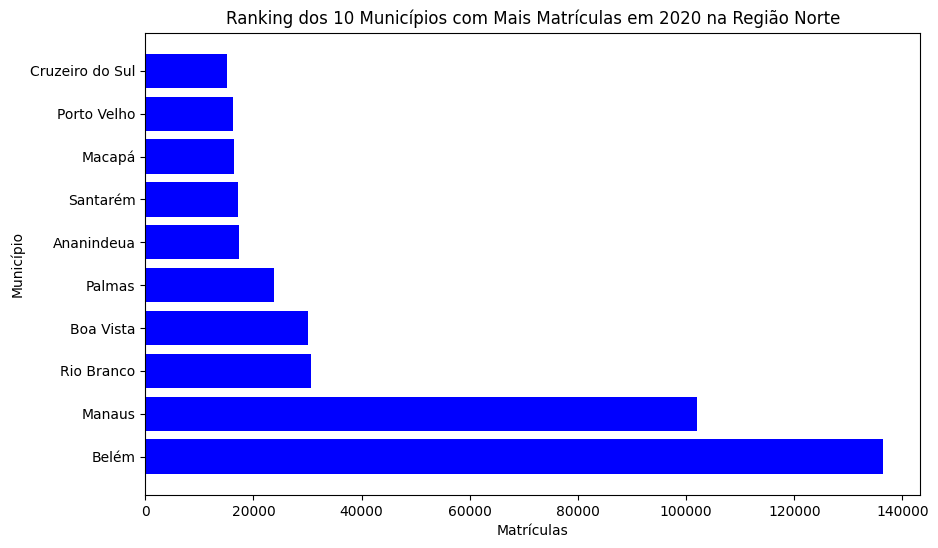

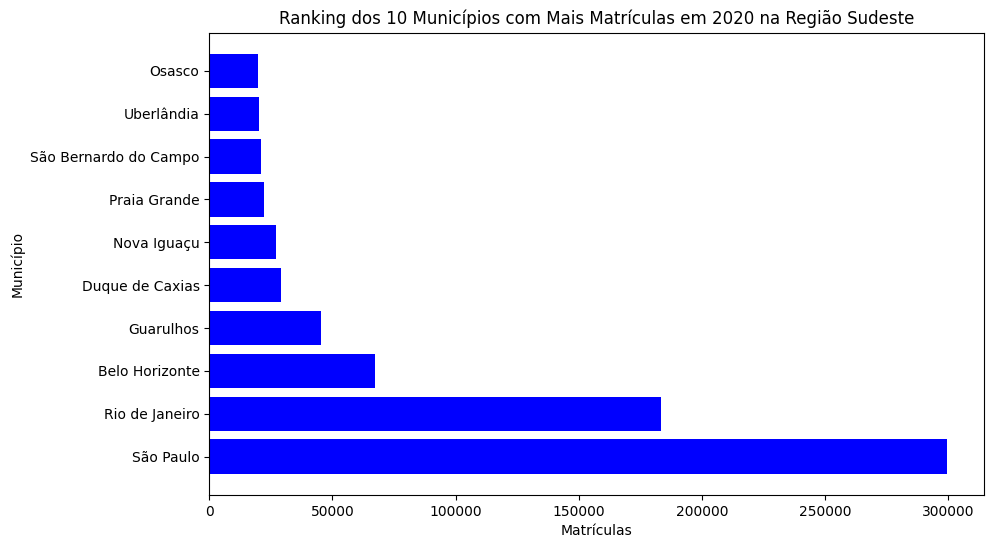

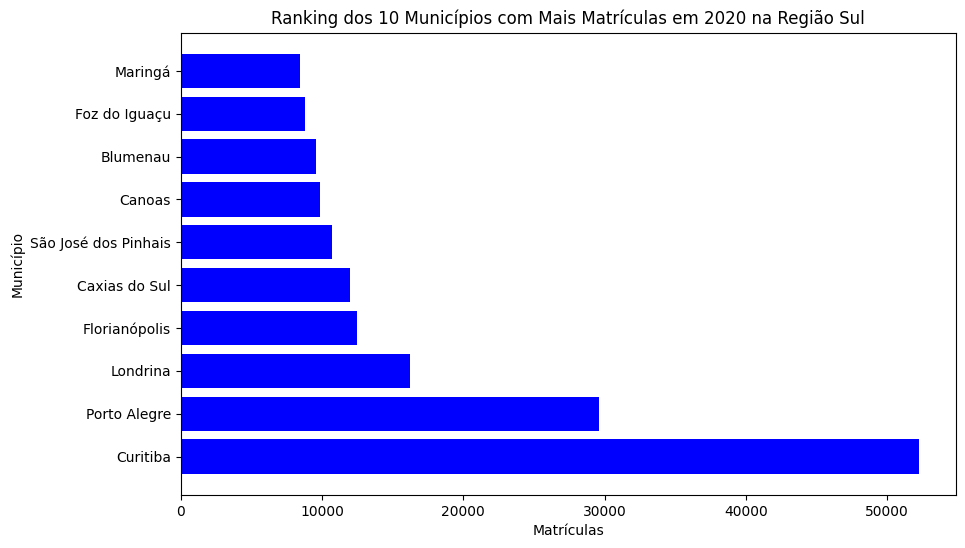

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Groupby por 'Ano', 'Região', 'Município' e soma das matrículas para cada município dentro de cada ano e região.
ranking_municipios_ano_regiao = df.groupby(['Ano', 'Região', 'Município'])['Matrículas'].sum().reset_index()

dados_grafico = []

anos_regioes_unicos = ranking_municipios_ano_regiao[['Ano', 'Região']].drop_duplicates()

for _, row in anos_regioes_unicos.iterrows():
    ano, regiao = row['Ano'], row['Região']
    
    ranking_ano_regiao = ranking_municipios_ano_regiao[(ranking_municipios_ano_regiao['Ano'] == ano) & (ranking_municipios_ano_regiao['Região'] == regiao)]
    
    ranking_municipio_regiao_ano = ranking_ano_regiao.groupby(['Município'])['Matrículas'].sum().reset_index()
  
    ranking_municipio_regiao_ano = ranking_municipio_regiao_ano.sort_values(by='Matrículas', ascending=False).head(10)
    
    dados_grafico.append((ano, regiao, ranking_municipio_regiao_ano))

# 4. gráfico de barras para cada ano e região.
for ano, regiao, ranking_municipio_regiao_ano in dados_grafico:
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.barh(ranking_municipio_regiao_ano['Município'], ranking_municipio_regiao_ano['Matrículas'], color='blue')  # Cria o gráfico de barras horizontal

   
    plt.xlabel('Matrículas')
    plt.ylabel('Município')
    plt.title(f'Ranking dos 10 Municípios com Mais Matrículas em {ano} na Região {regiao}')

    plt.show()

## Ranking Top 10 Municípos com mais Docentes de cada Região por ano

In [38]:
from tabulate import tabulate

# 1. Agrupe por 'Ano', 'Região', 'Município' e some as matrículas para cada cidade dentro de cada ano e região.
ranking_municipios_ano_regiao = df.groupby(['Ano', 'Região', 'Município'])['Docentes'].sum().reset_index()

# 2. Para cada ano e região, calcule o ranking dos 10 municípios com mais matrículas.
anos_regioes_unicos = ranking_municipios_ano_regiao[['Ano', 'Região']].drop_duplicates()

for _, row in anos_regioes_unicos.iterrows():
    ano, regiao = row['Ano'], row['Região']
    print(f"ANO   : {ano}")
    print(f"Região: {regiao}")
    
    ranking_ano_regiao = ranking_municipios_ano_regiao[(ranking_municipios_ano_regiao['Ano'] == ano) & (ranking_municipios_ano_regiao['Região'] == regiao)]
    
    # Agrupe por 'Município' e some as matrículas para cada cidade dentro da região e ano.
    ranking_municipio_regiao_ano = ranking_ano_regiao.groupby(['Município'])['Docentes'].sum().reset_index()
    
    # Calcule o ranking dos 10 municípios com mais matrículas naquela região e ano.
    ranking_municipio_regiao_ano = ranking_municipio_regiao_ano.sort_values(by='Docentes', ascending=False).head(10)
    
    # Crie uma tabela formatada com tabulate e exiba.
    table = tabulate(ranking_municipio_regiao_ano, headers=['Município', 'Docentes'], tablefmt='pretty', showindex=False)
    print(table)
    print()

ANO   : 2012
Região: Centro Oeste
+-----------------------+----------+
|       Município       | Docentes |
+-----------------------+----------+
|        Goiânia        |   2011   |
|        Cuiabá         |   1158   |
| Aparecida de Goiânia  |   907    |
|       Anápolis        |   709    |
|     Rondonópolis      |   513    |
|       Luziânia        |   399    |
|       Dourados        |   395    |
| Águas Lindas de Goiás |   297    |
|       Rio Verde       |   294    |
|       Itumbiara       |   280    |
+-----------------------+----------+

ANO   : 2012
Região: Nordeste
+------------------+----------+
|    Município     | Docentes |
+------------------+----------+
|     Salvador     |   4838   |
|    Fortaleza     |   3995   |
|      Recife      |   2876   |
|     São Luís     |   2435   |
|     Teresina     |   2326   |
| Feira de Santana |   1329   |
|   João Pessoa    |   1269   |
|      Natal       |   1201   |
|      Maceió      |   1067   |
|    Santa Inês    |   1028   |
+

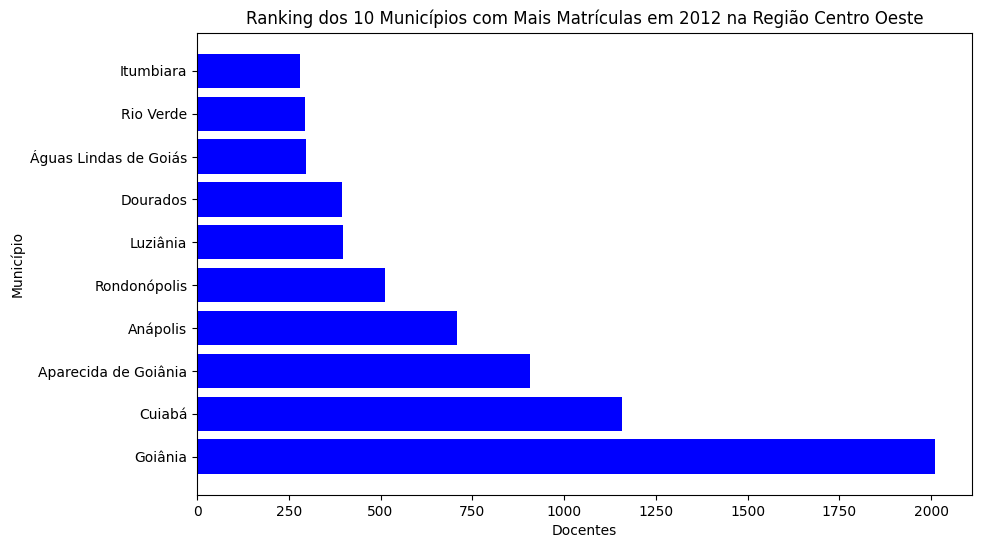

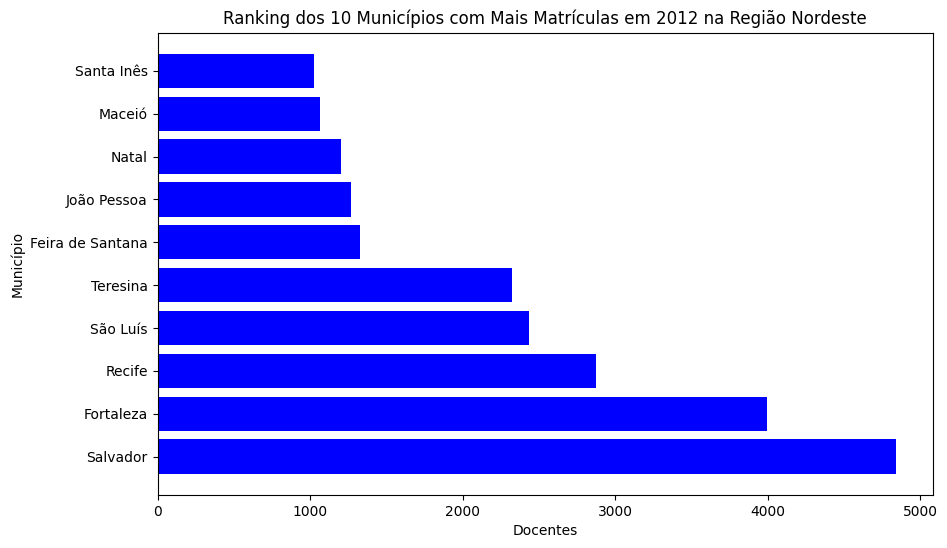

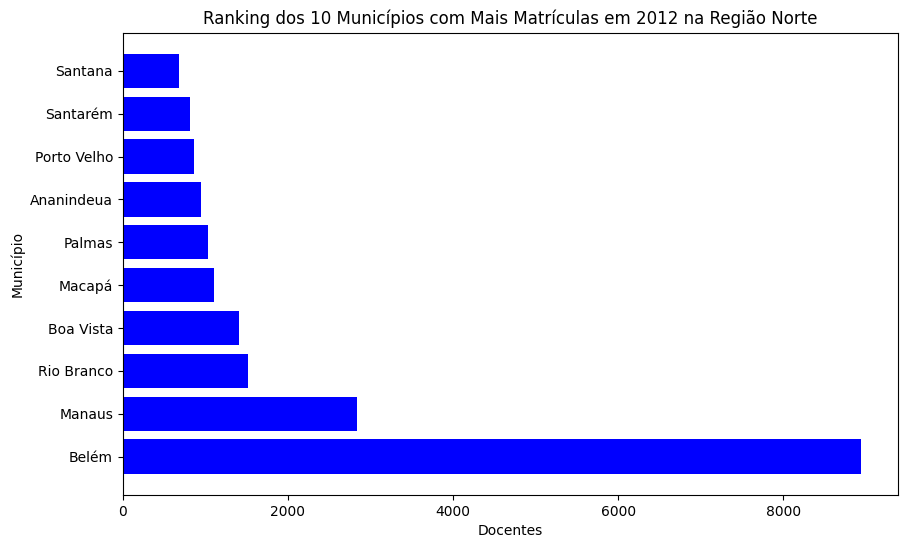

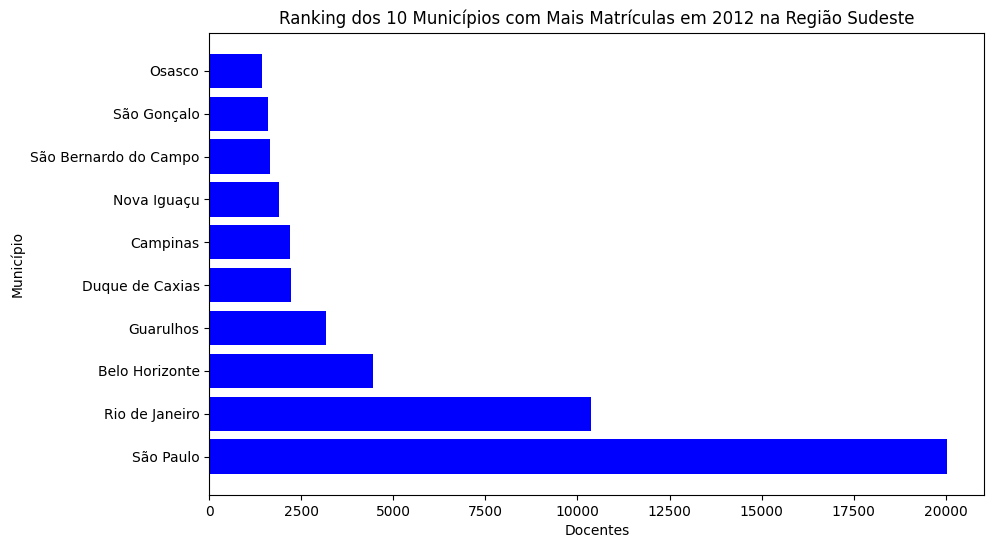

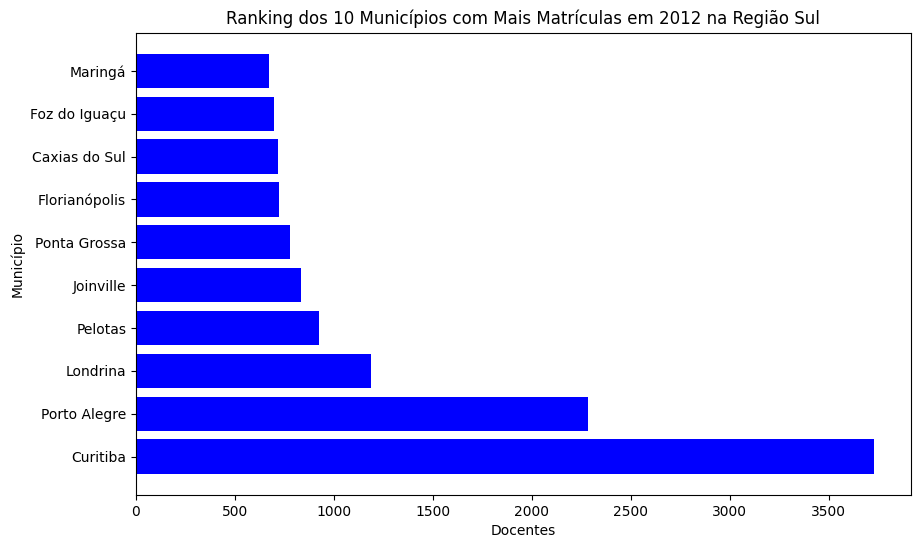

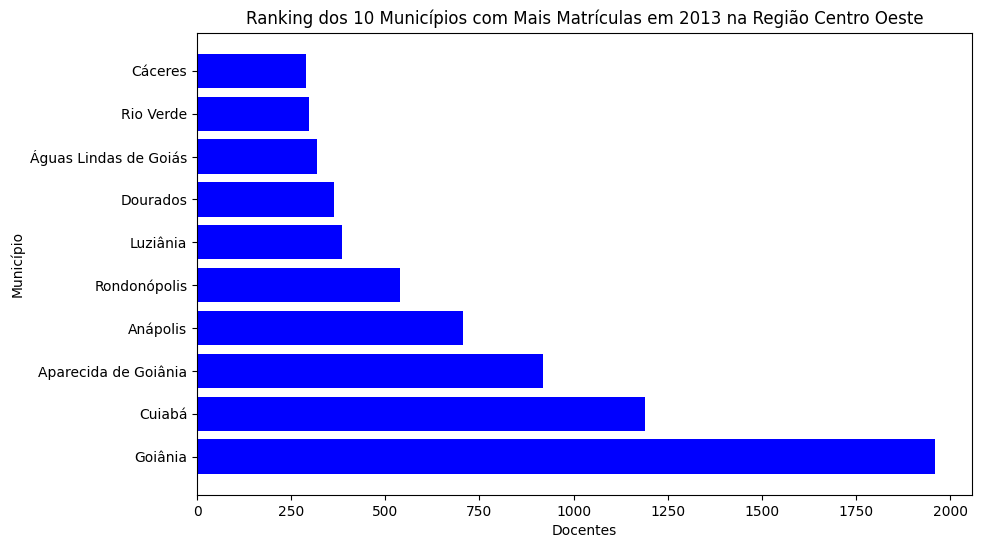

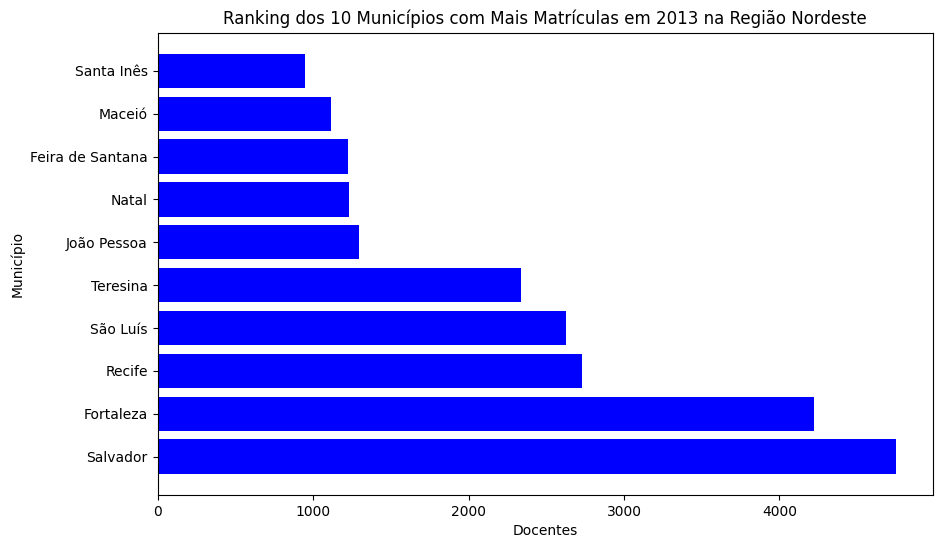

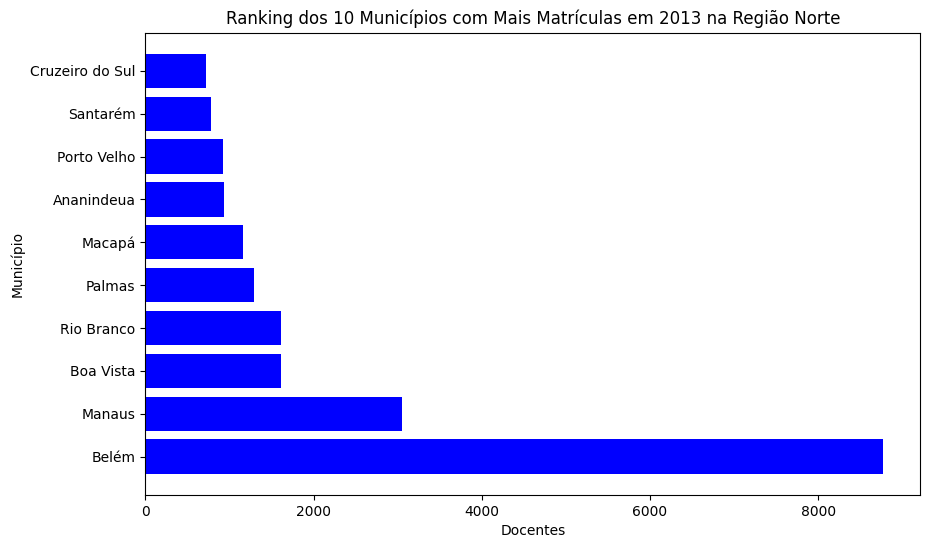

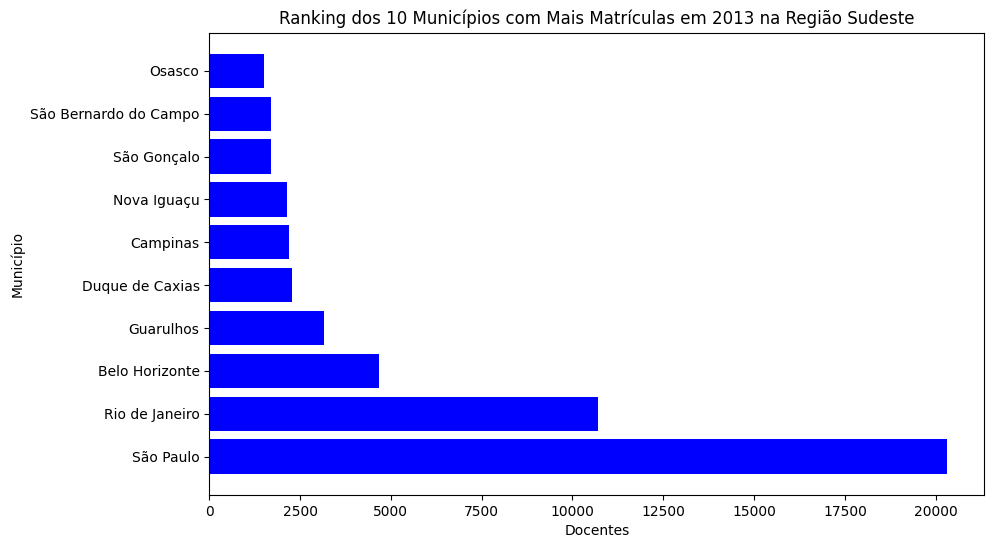

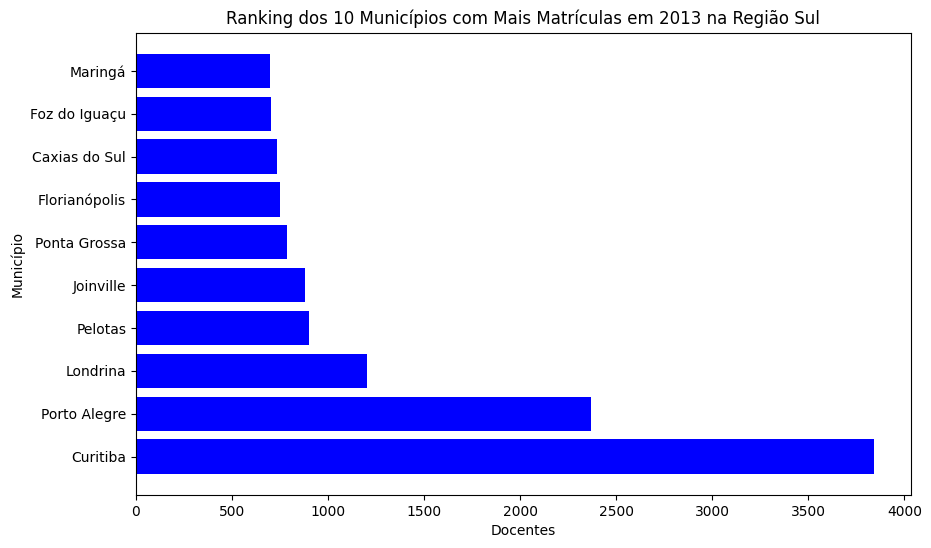

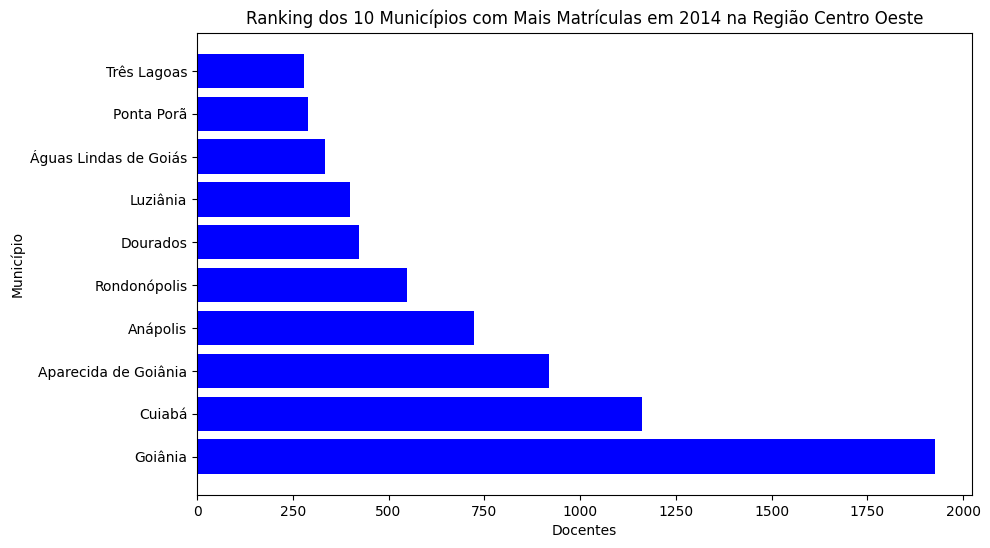

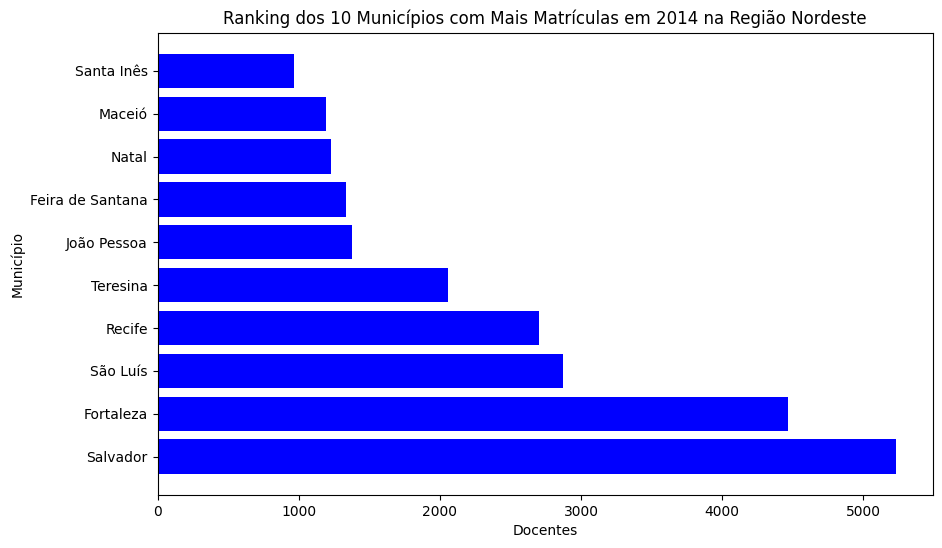

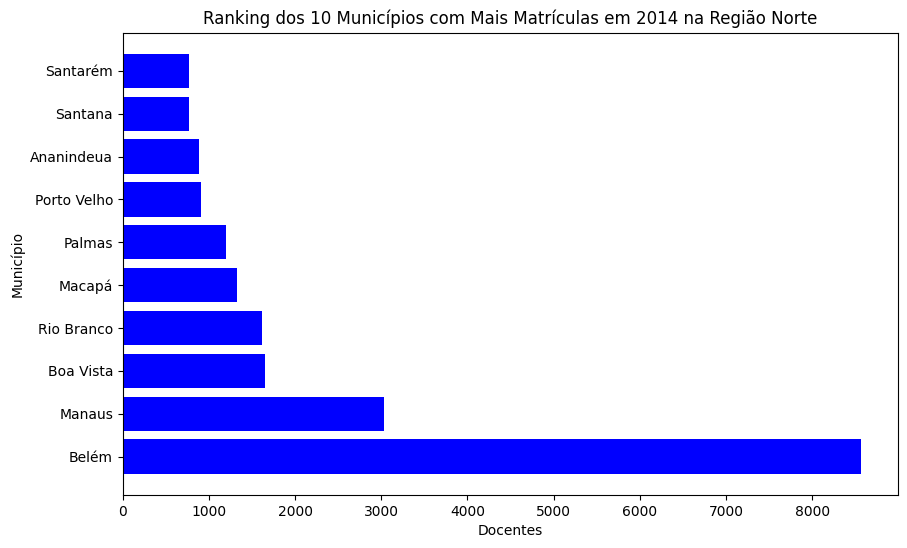

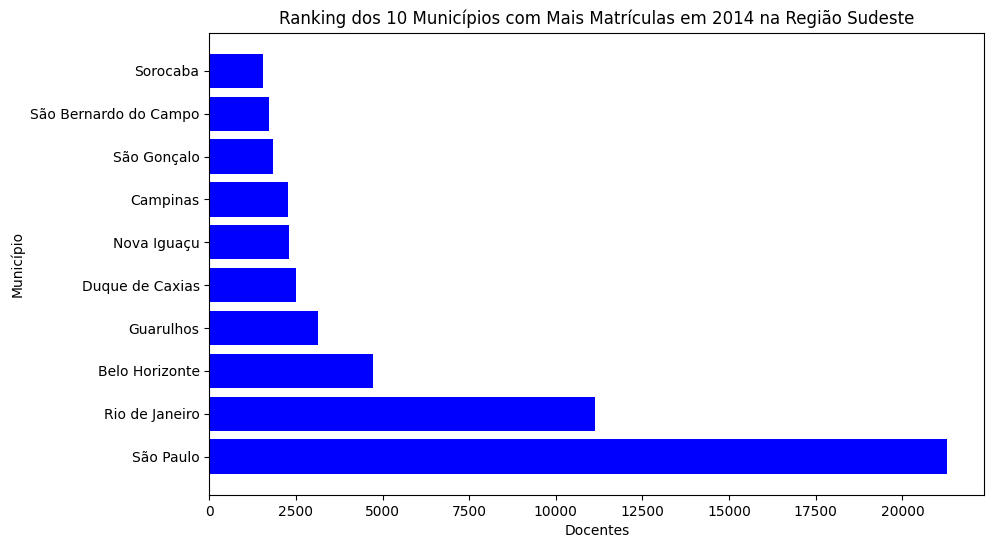

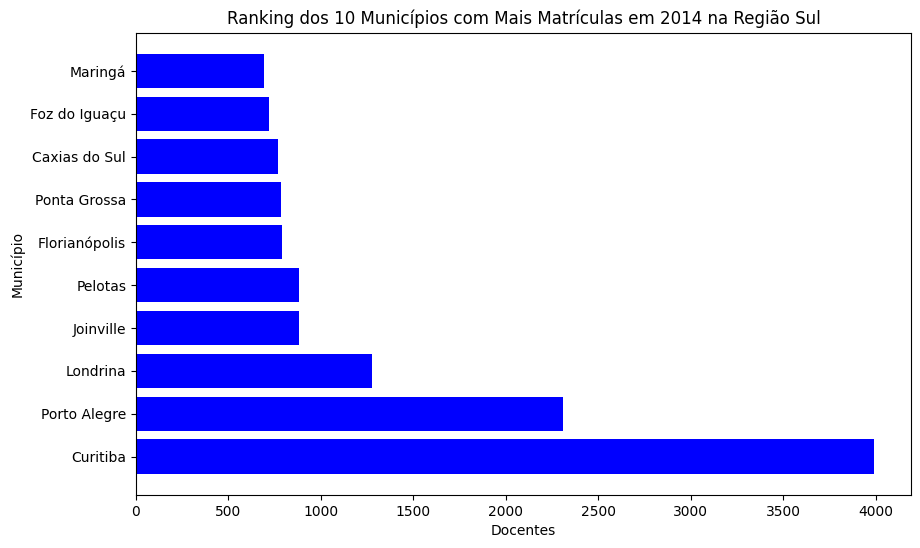

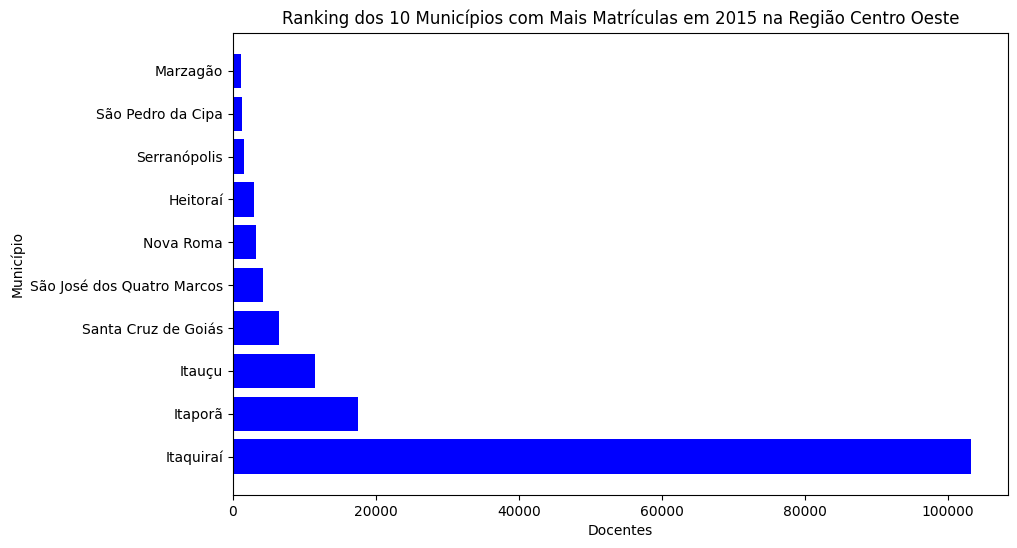

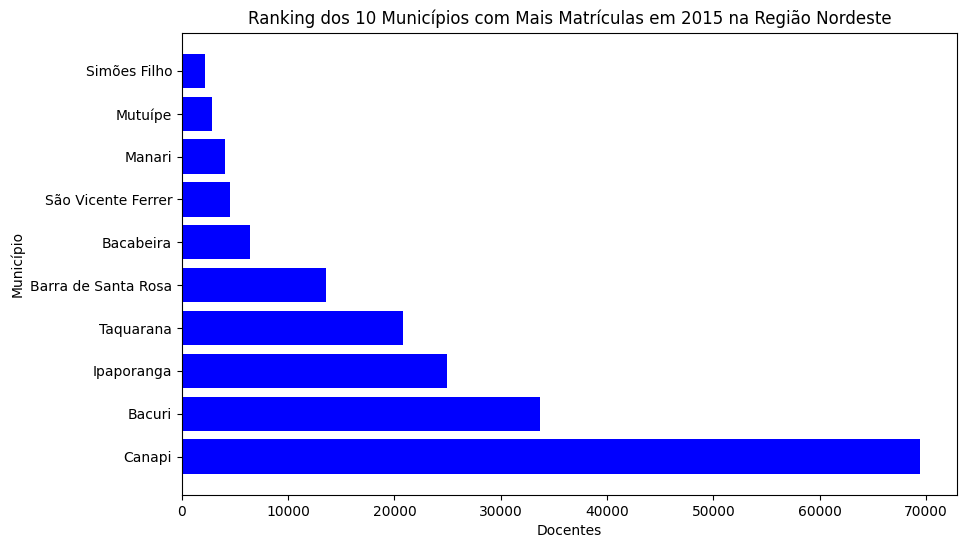

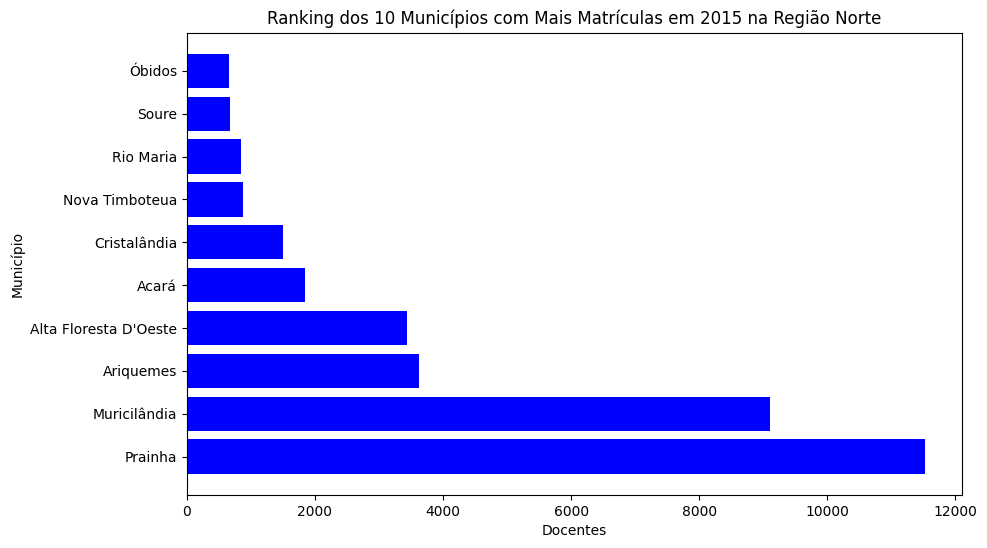

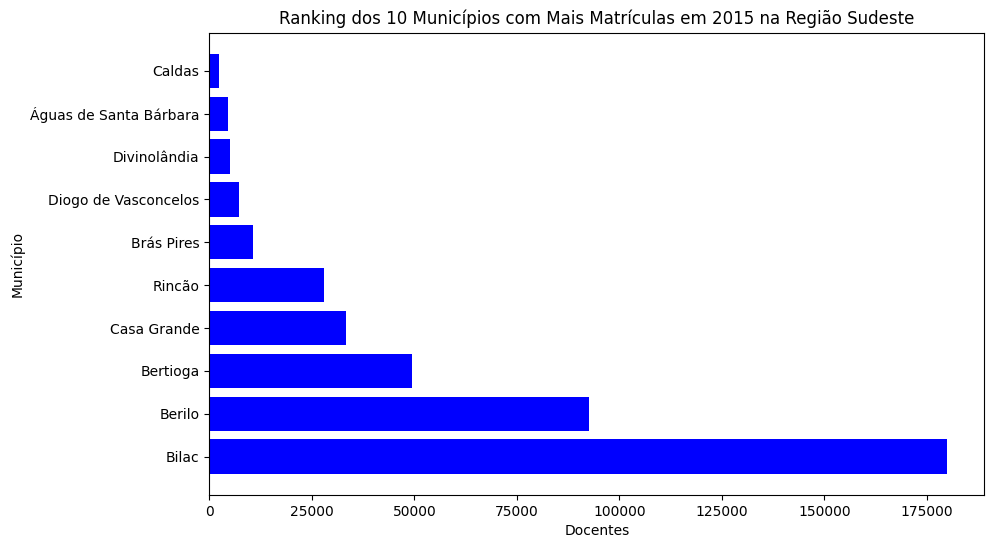

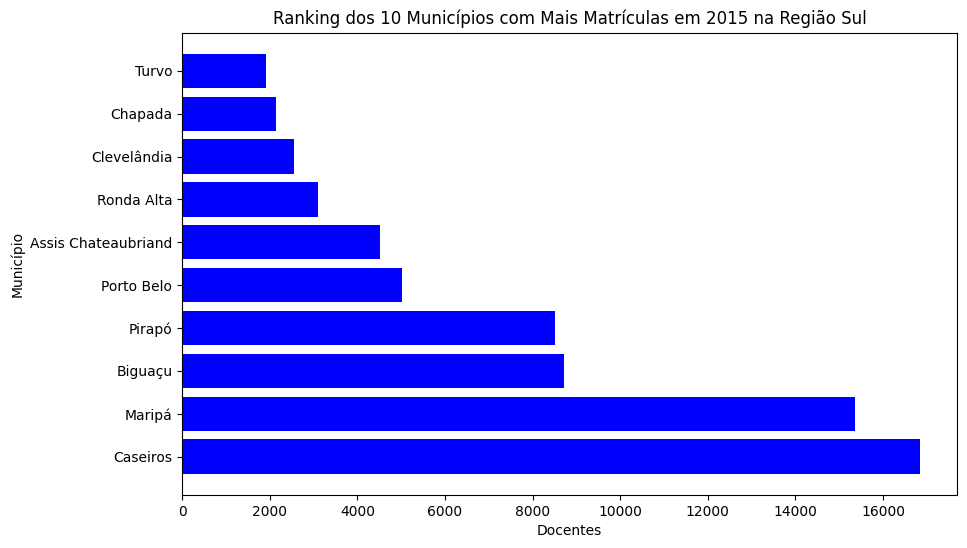

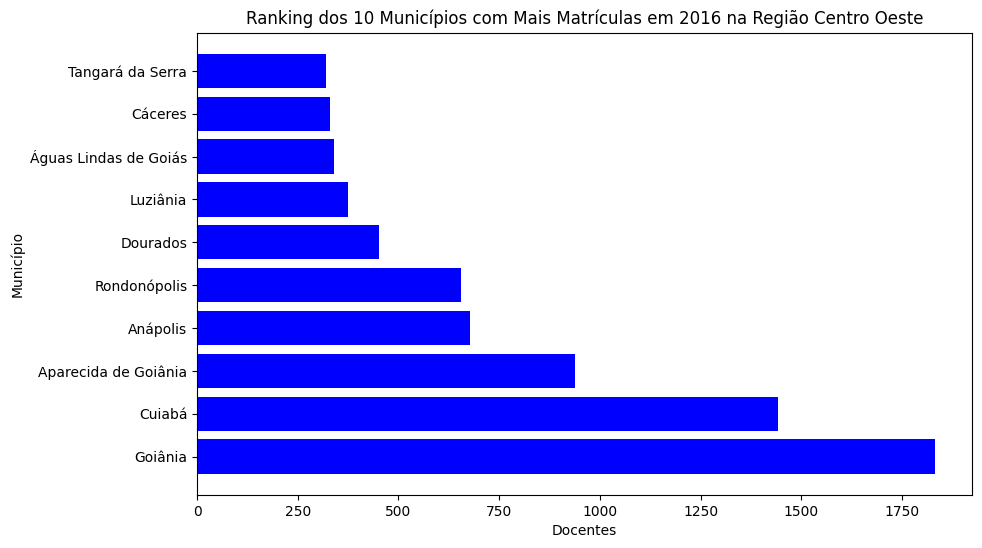

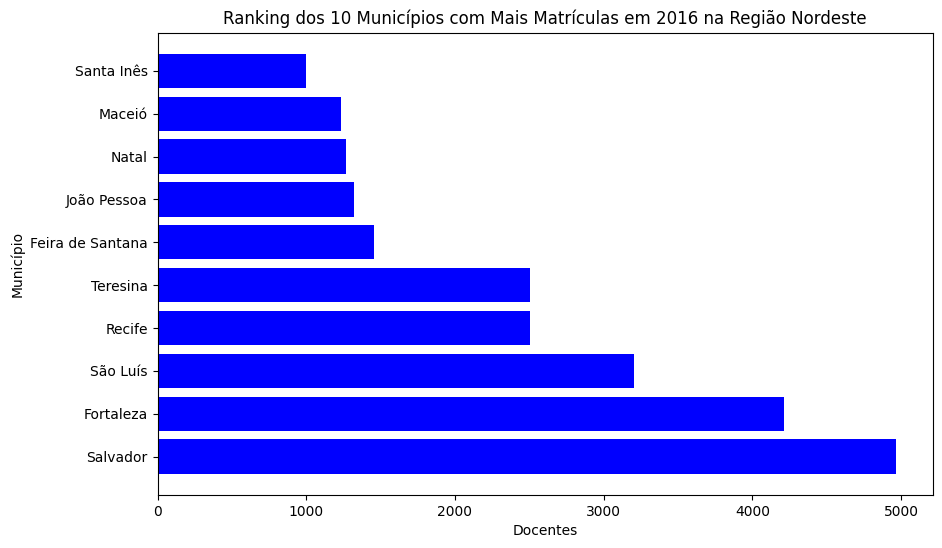

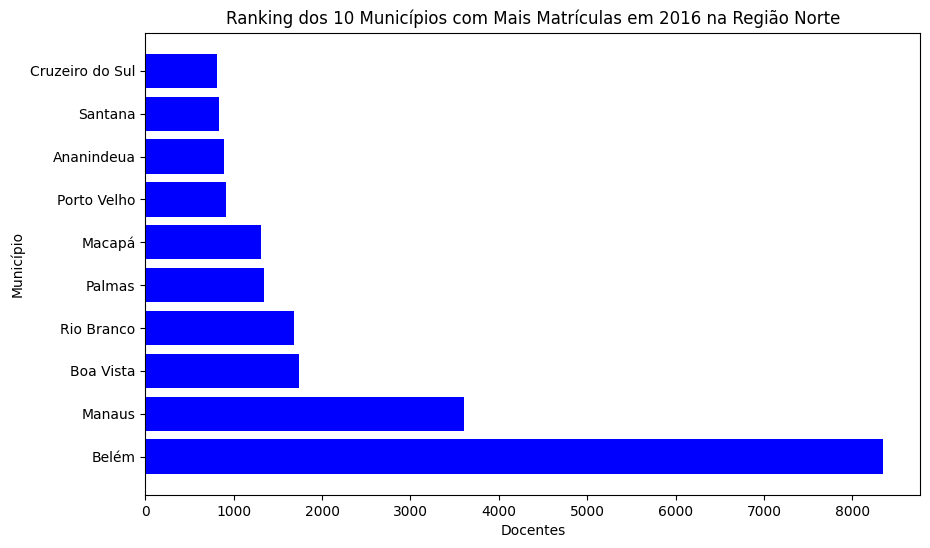

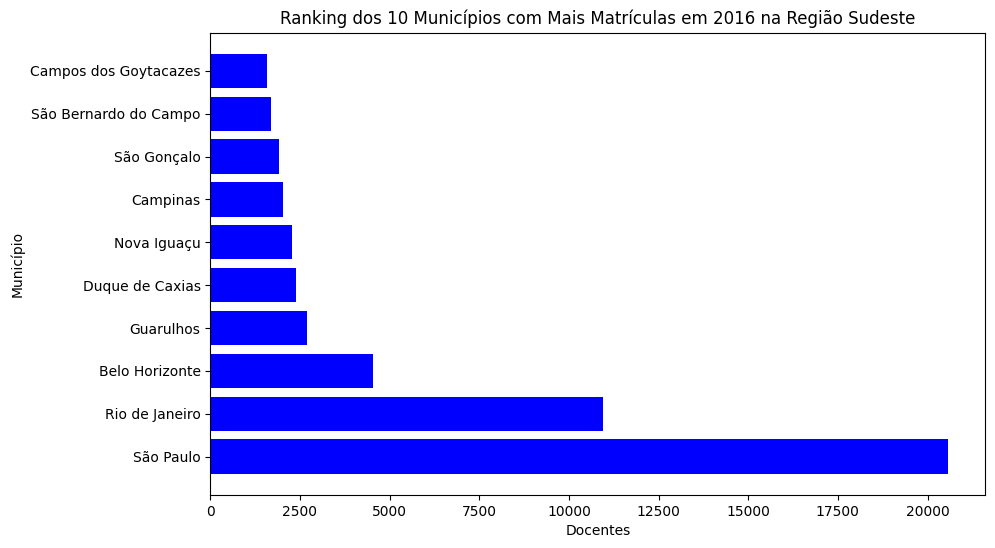

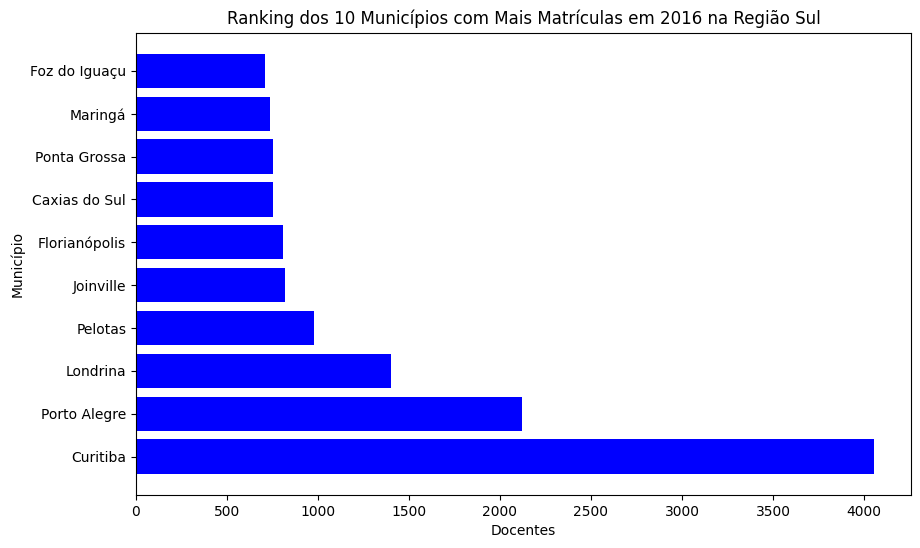

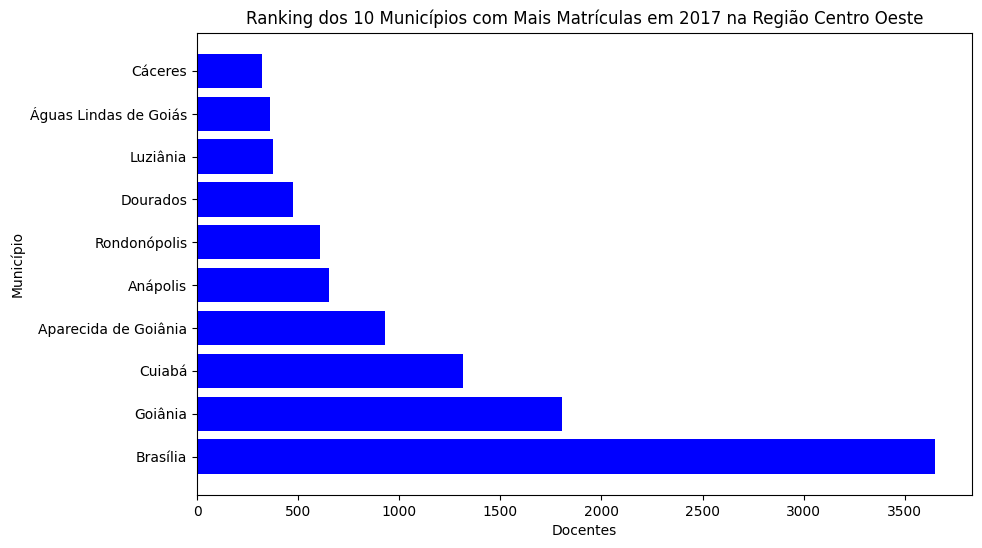

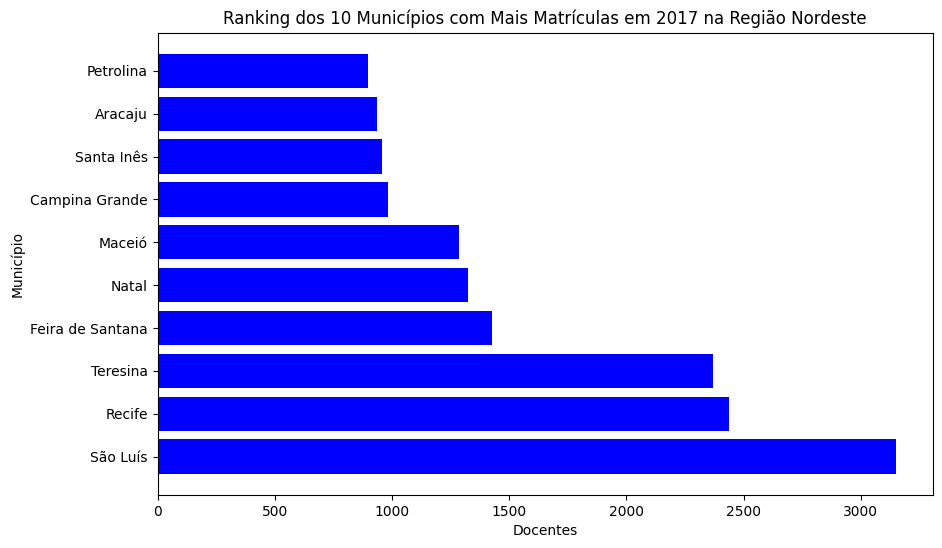

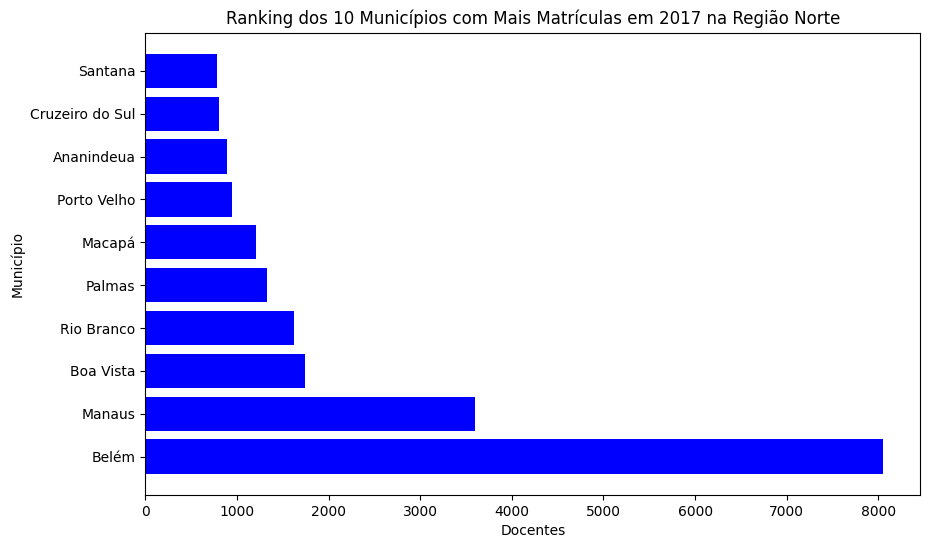

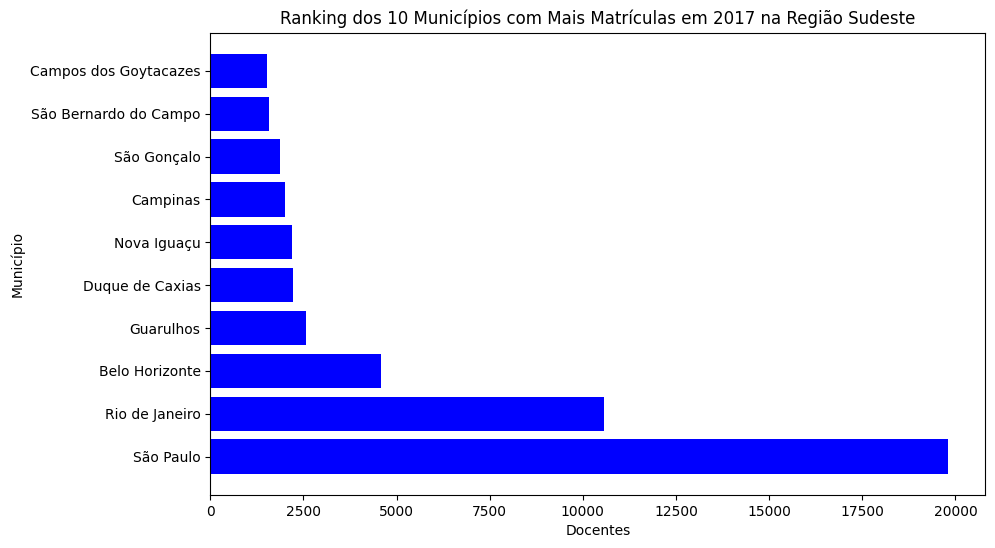

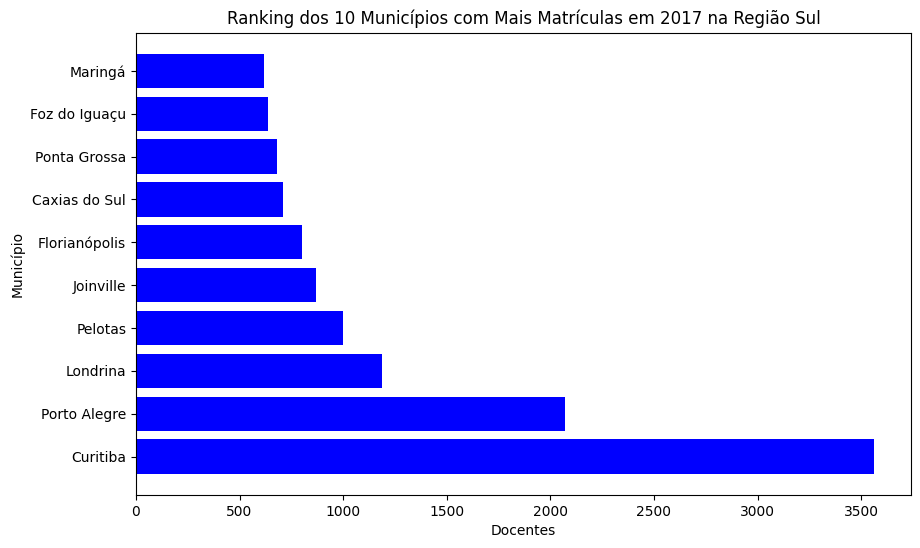

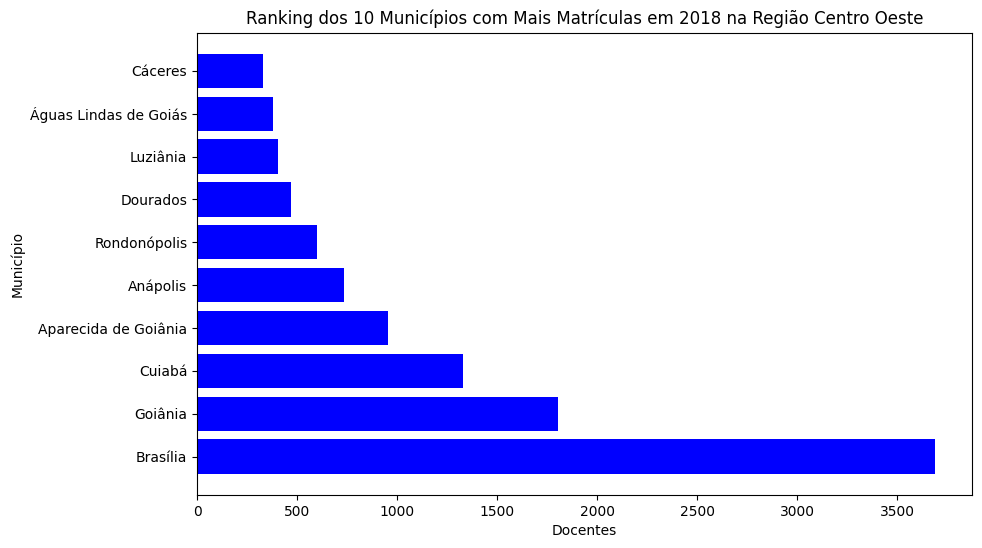

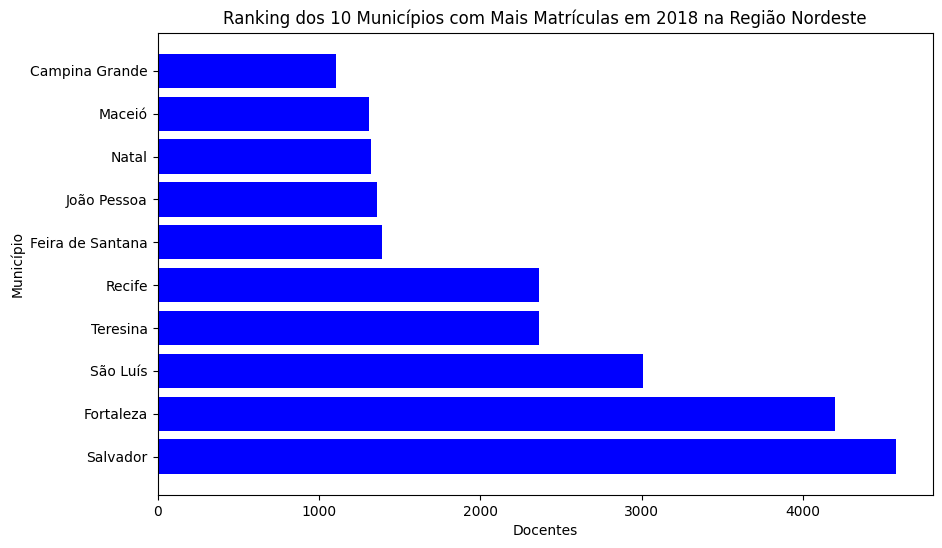

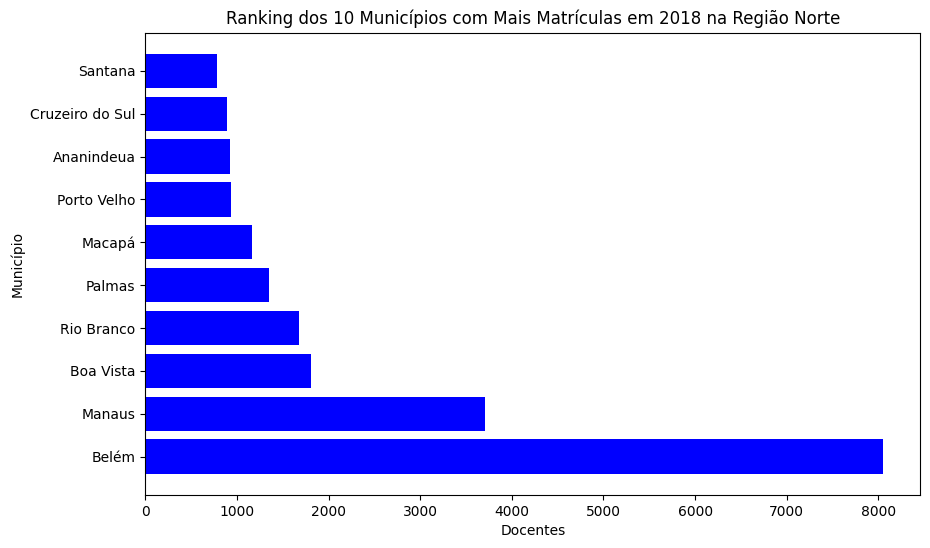

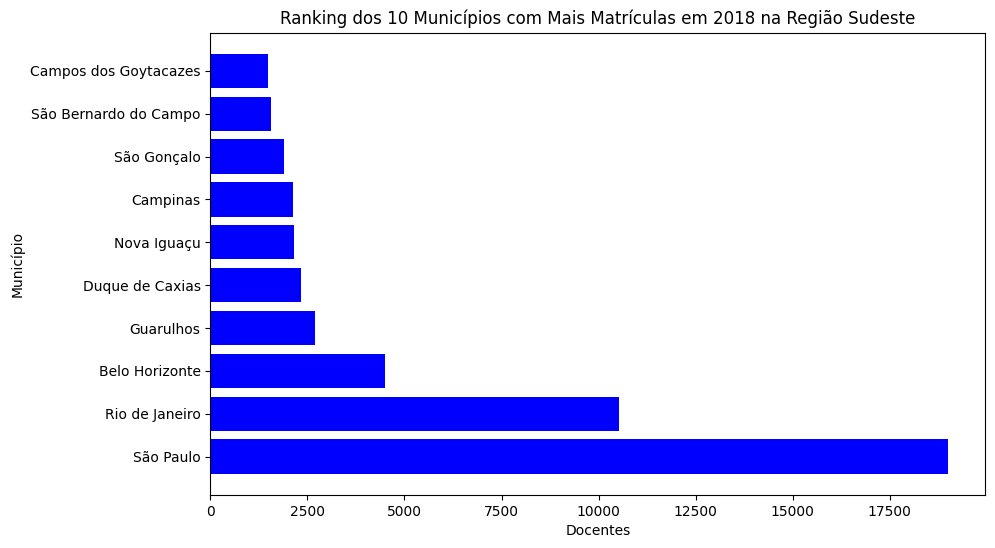

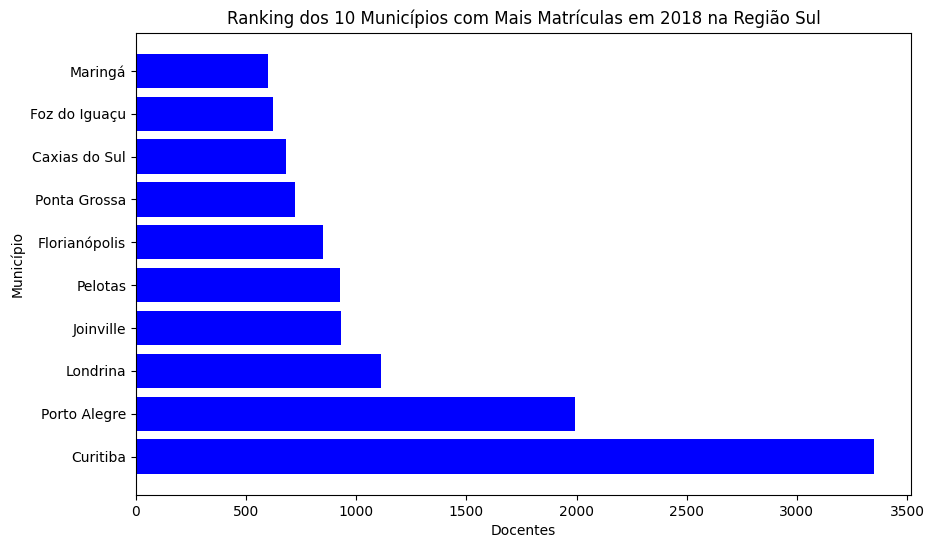

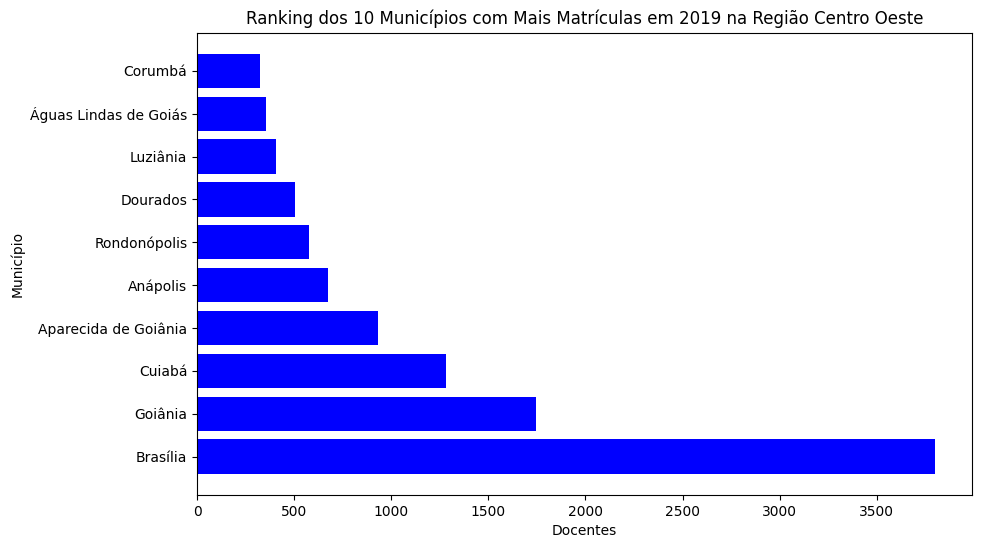

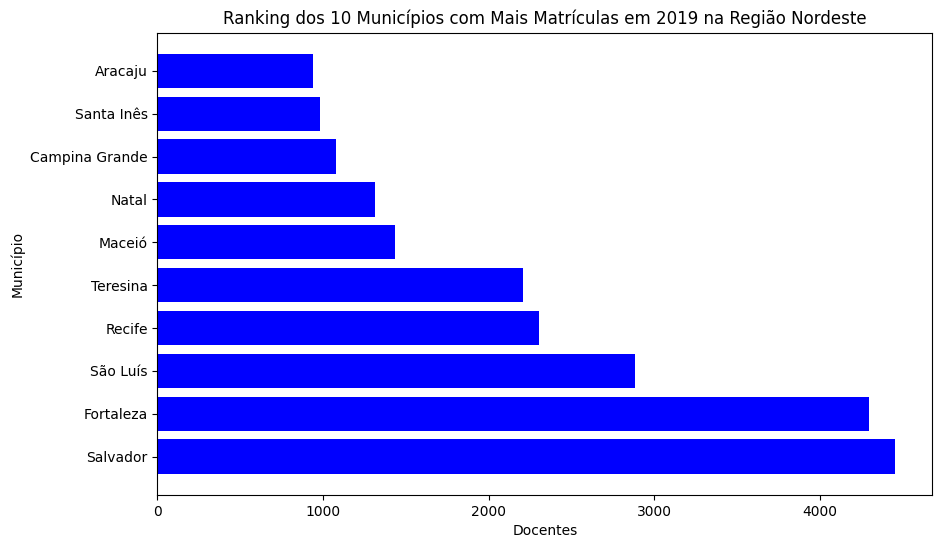

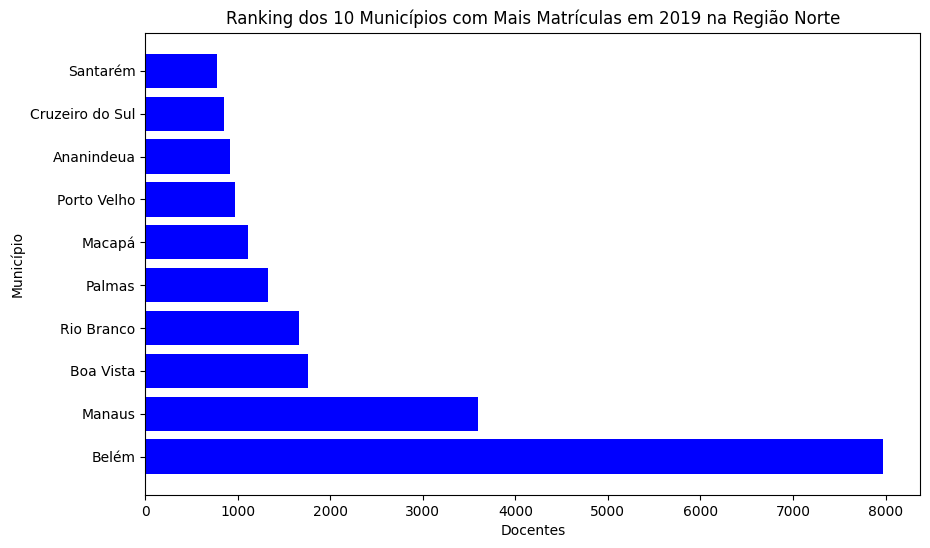

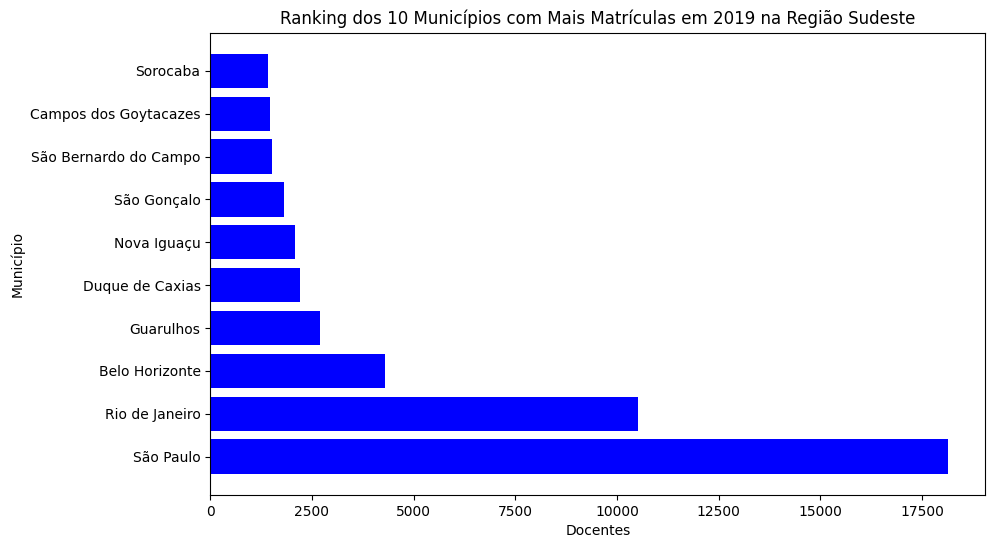

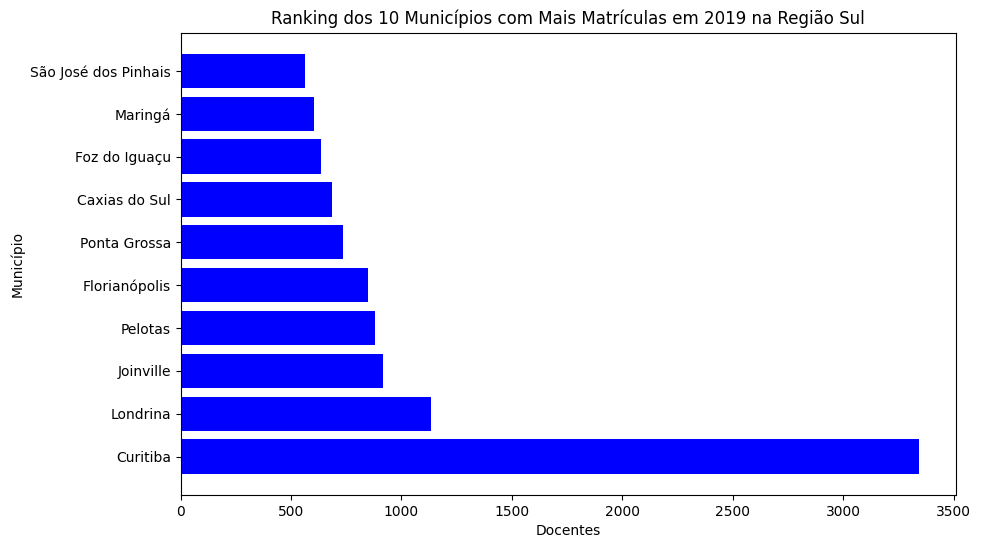

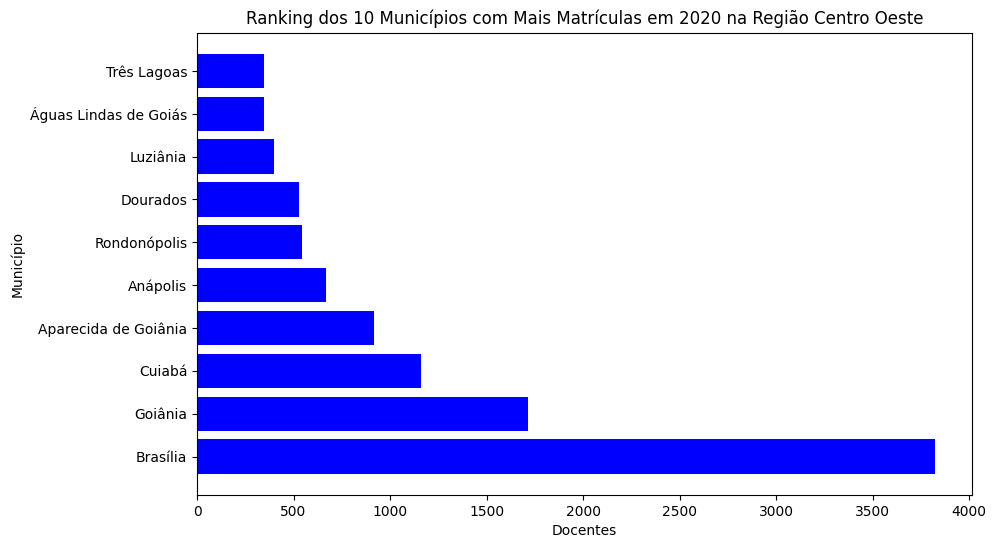

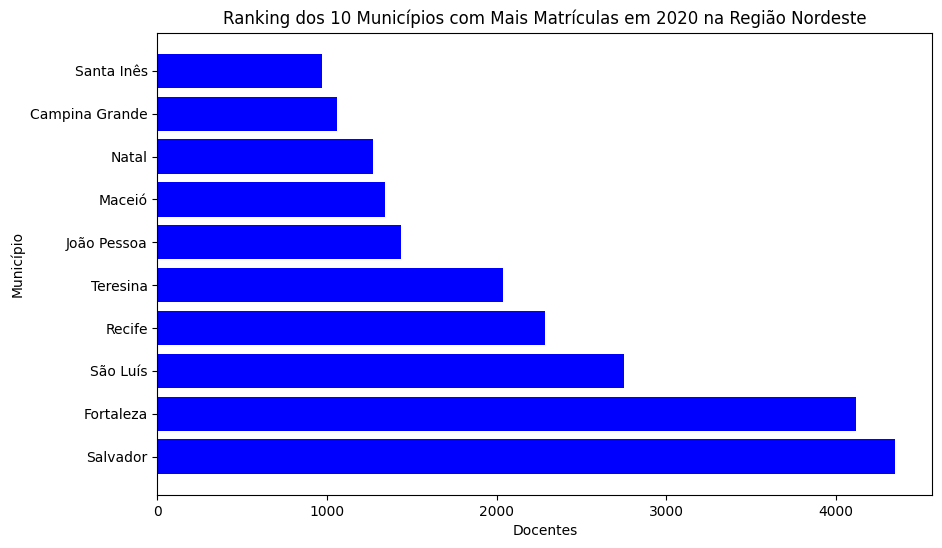

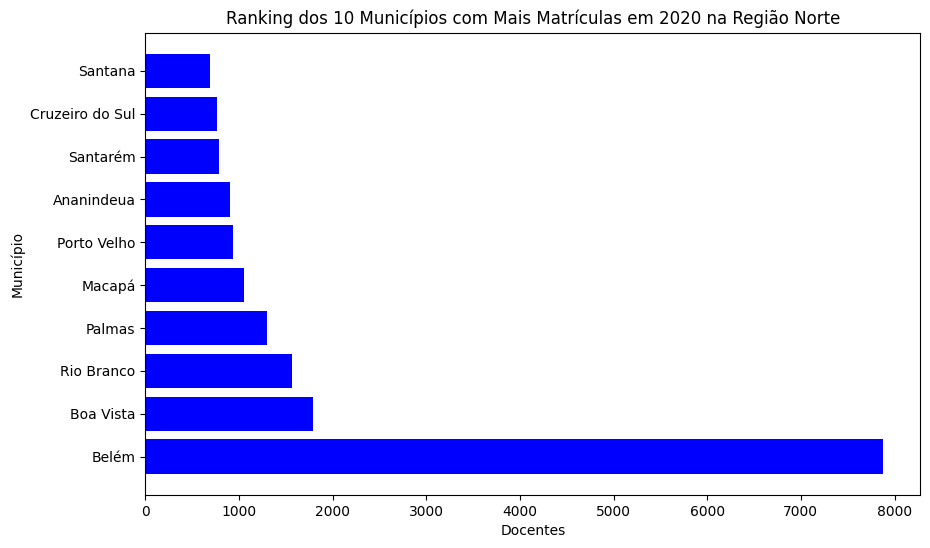

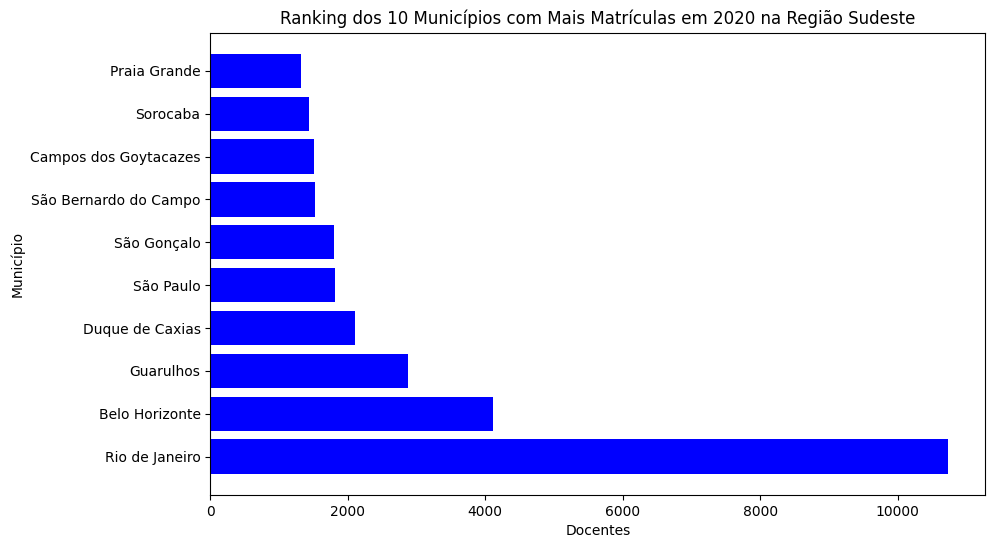

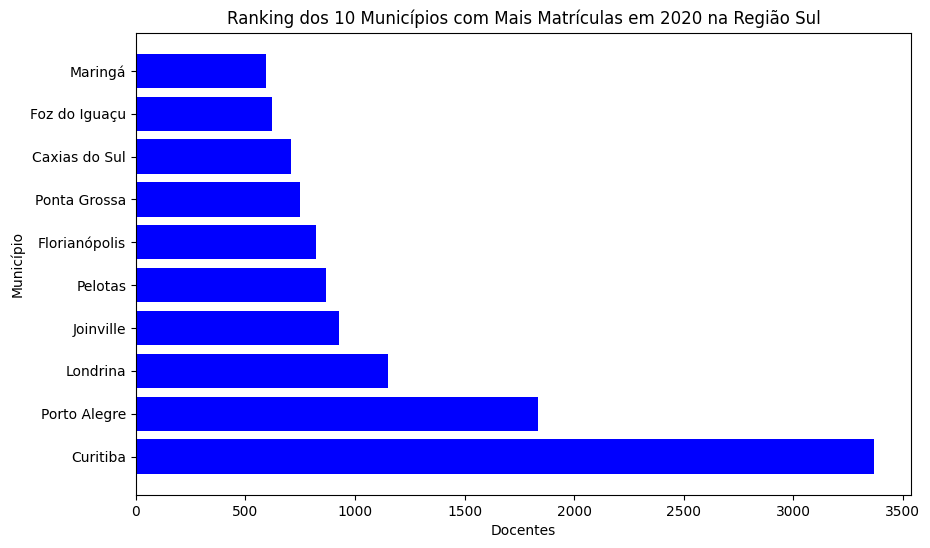

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Groupby por 'Ano', 'Região', 'Município' e soma das matrículas para cada município dentro de cada ano e região.
ranking_municipios_ano_regiao = df.groupby(['Ano', 'Região', 'Município'])['Docentes'].sum().reset_index()

dados_grafico = []

anos_regioes_unicos = ranking_municipios_ano_regiao[['Ano', 'Região']].drop_duplicates()

for _, row in anos_regioes_unicos.iterrows():
    ano, regiao = row['Ano'], row['Região']
    
    ranking_ano_regiao = ranking_municipios_ano_regiao[(ranking_municipios_ano_regiao['Ano'] == ano) & (ranking_municipios_ano_regiao['Região'] == regiao)]
    
    ranking_municipio_regiao_ano = ranking_ano_regiao.groupby(['Município'])['Docentes'].sum().reset_index()
  
    ranking_municipio_regiao_ano = ranking_municipio_regiao_ano.sort_values(by='Docentes', ascending=False).head(10)
    
    dados_grafico.append((ano, regiao, ranking_municipio_regiao_ano))

# 4. gráfico de barras para cada ano e região.
for ano, regiao, ranking_municipio_regiao_ano in dados_grafico:
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.barh(ranking_municipio_regiao_ano['Município'], ranking_municipio_regiao_ano['Docentes'], color='blue')  # Cria o gráfico de barras horizontal

   
    plt.xlabel('Docentes')
    plt.ylabel('Município')
    plt.title(f'Ranking dos 10 Municípios com Mais Matrículas em {ano} na Região {regiao}')

    plt.show()